In [9]:
import collections
import scrapy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import keras
from textwrap import wrap

In [10]:
class Wordicts():
    def onedict(self, text):
        onecounter = dict(collections.Counter(str(text).split(" ")))
        # Dictionary: keys are all the words; values are how frequently they occur. 
        onedict = {k:(v/sum(onecounter.values())) for(k, v) in zip(onecounter.keys(), onecounter.values())}
        # Converts the absolute number of occurences to a decimal portion of total two word sequences.
        return onedict
    def twodict(self, text):
        ow = str(text).split(" ")  
        tw = [ow[i] + ow[i+1] for i in range(len(ow)-1)]
        # Joins every list item to the next list item, with no spaces. Creates list of all two-word sequences in the text.
        twocounter = dict(collections.Counter(tw))  
        twodict = {k:(v/sum(twocounter.values())) for(k, v) in zip(twocounter.keys(), twocounter.values())} 
        return twodict
    def threedict(self, text):
        # Same as the twodict function, but for three word sequences.
        ow = str(text).split(" ")
        thr = [ow[i] + ow[i+1] + ow[i+2] for i in range(len(ow)-2)]
        threecounter = dict(collections.Counter(thr))
        threedict = {k:(v/sum(threecounter.values())) for(k, v) in zip(threecounter.keys(), threecounter.values())}
        return threedict
    def compare(self, text1, text2, wordlengthweights):
        # This function is only used for the heatmap visualization
        if len(wordlengthweights) != 3:
            # This case and the next return division by zero errors if the condition is met
            1/0  # Wordlengthweights should be a list with three values, corresponding to single words, two word pairs, and three word phrases respectively.
        if sum(wordlengthweights) != 1:
            1/0  # Wordlengthweights should add up to 1.
        freqdict1 = {'onedict': self.onedict(text1), 'twodict': self.twodict(text1), 'threedict': self.threedict(text1)}
        freqdict2 = {'onedict': self.onedict(text2), 'twodict': self.twodict(text2), 'threedict': self.threedict(text2)}
        dictlist = ['onedict', 'twodict', 'threedict']
        score = []  # Each element is the comparison score for a different length in dictlist
        for i in range(3):
            if wordlengthweights[i] != 0:
                k = dictlist[i]
                intersection = list(set(freqdict1[k].keys()).intersection(set(freqdict2[k].keys())))
                # Words/phrases that both texts have
                prelimscore = sum([(min(freqdict1[k][j], freqdict2[k][j])) for j in intersection])
                # Similarity is the union of all words/phrases, or the smaller portion when the two texts both have the word/phrase
                score.append(prelimscore)
            else:
                score.append(0)
        adjusted = sum([wordlengthweights[i]*score[i] for i in range(3)])
        return adjusted  # Returns a comparison score adjusted for whichever lengths are weighted highest
    def longwords7(self, text):
        words = str(text).split(" ")
        longwords = sum([1 if len(i)>6 else 0 for i in words])
        longpercentage = float(longwords/len(words))
        return longpercentage
    def longwords10(self, text):
        words = str(text).split(" ")
        longwords = sum([1 if len(i)>9 else 0 for i in words])
        longpercentage = float(longwords/len(words))
        return longpercentage
    def apostrophe(self, text):
        apostrophes = str(text).split("'")
        apostrophepercentage = len(apostrophes)/len(str(text).split(" "))
        return apostrophepercentage
    def comma(self, text):
        commas = str(text).split(",")
        commapercentage = len(commas)/len(str(text).split(" "))
        return commapercentage
    def period(self, text):
        periods = str(text).split(".")
        periodpercentage = len(periods)/len(str(text).split(" "))
        return periodpercentage
    def uniquewords(self, text):
        uw = len(dict(collections.Counter(str(text).split(" "))))
        up = uw/len(str(text).split(" "))
        return up

In [7]:
# 32 texts we'll use
n9841 = open('1984Chapter1.txt', 'r').read()  # George Orwell
n9842 = open('1984Chapter2.txt', 'r').read() 
af1 = open('AnimalFarmChapter1.txt', 'r').read()
af2 = open('AnimalFarmChapter2.txt', 'r').read()
hobbit1 = open('TheHobbitChapter1.txt', 'r').read()  # J.R.R. Tolkien
hobbit2 = open('TheHobbitChapter2.txt', 'r').read()
frf = open('TheFellowshipoftheRingForeword.txt', 'r').read()
frp = open('TheFellowshipoftheRingPrologue.txt', 'r').read()
ge1 = open('GreatExpectationsChapter1.txt', 'r').read()  # Charles Dickens
ge2 = open('GreatExpectationsChapter2.txt', 'r').read()
dp1 = open('TheDetectivePolicePart1.txt', 'r').read()
dp2 = open('TheDetectivePolicePart2.txt', 'r').read()
pp12 = open('PrideandPrejudiceChapter1-2.txt', 'r').read()  # Jane Austen
pp3 = open('PrideandPrejudiceChapter3.txt', 'r').read()
ps1 = open('PersuasionChapter1.txt', 'r').read()
ps2 = open('PersuasionChapter2.txt', 'r').read()
hs1 = open('HindSwarajChapter1.txt', 'r').read()  # Mahatma Gandhi
hs24 = open('HindSwarajChapter2-4.txt', 'r').read()
gh13 = open('AGuidetoHealthChapter1-3.txt', 'r').read()
gh45 = open('AGuidetoHealthChapter4-5.txt', 'r').read()
ts1 = open('TomSawyerChapter1.txt', 'r').read()  # Mark Twain
ts2 = open('TomSawyerChapter2.txt', 'r').read()
ava = open('TheAmericanVandalAbroad.txt', 'r').read()
ats = open('AmongtheSpirits.txt', 'r').read()
tl1 = open('ALetterConcerningTolerationPart1.txt', 'r').read()  # John Locke
tl2 = open('ALetterConcerningTolerationPart2.txt', 'r').read()
ed1 = open('SomeThoughtsConcerningEducationPart1.txt', 'r').read()
ed2 = open('SomeThoughtsConcerningEducationPart2.txt', 'r').read()
lv12 = open('LeviathanOfManChapter1-2.txt', 'r').read()  # Thomas Hobbes
lv3 = open('LeviathanOfManChapter3.txt', 'r').read()
law12 = open('TheElementsOfLawChapter1-2.txt', 'r').read()
law3 = open('TheElementsOfLawChapter3.txt', 'r').read()

passages = [n9841, n9842, af1, af2, hobbit1, hobbit2, frf, frp, ge1, ge2, dp1, dp2, pp12, pp3, ps1, ps2, hs1, hs24, gh13, gh45, ts1, ts2, ava, ats, tl1, tl2, ed1, ed2, lv12, lv3, law12, law3]
passagesref = ['1984-1', '1984-2', 'Animal Farm 1', 'Animal Farm 2', 'Hobbit 1', 'Hobbit 2', 'Fellowship of the Ring Foreword', 'Fellowship of the Ring Prologue', 'Great Expectations 1', 'Great Expectations 2', 'Detective Police 1', 'Detective Police 2', 'Pride and Prejudice 1-2', 'Pride and Prejudice 3', 'Persuasion 1', 'Persuasion 2', 'Hind Swaraj 1', 'Hind Swaraj 2-4', 'Guide to Health 1-3', 'Guide to Health 4-5', 'Tom Sawyer 1', 'Tom Sawyer 2', 'American Vandal Abroad', 'Among the Spirits', 'Toleration 1', 'Toleration 2', 'Education 1', 'Education 2', 'Leviathan 1-2', 'Leviathan 3', 'Elements of Law 1-2', 'Elements of Law 3']
longwords7dict = dict(zip(passages, [Wordicts().longwords7(i) for i in passages]))
longwords10dict = dict(zip(passages, [Wordicts().longwords10(i) for i in passages]))
apostrophedict = dict(zip(passages, [Wordicts().apostrophe(i) for i in passages]))
commadict = dict(zip(passages, [Wordicts().apostrophe(i) for i in passages]))
perioddict = dict(zip(passages, [Wordicts().period(i) for i in passages]))
uniquewords = dict(zip(passages, [Wordicts().uniquewords(i) for i in passages]))

In [12]:
print(Wordicts().compare(n9841, n9842, 'because'))

ZeroDivisionError: division by zero

In [5]:
#onewordsimilarity = [[Wordicts().compare(i, j, [1, 0, 0]) if passages.index(i) < passages.index(j) < len(passages) else 0 for j in passages] for i in passages]
#twowordsimilarity = [[Wordicts().compare(i, j, [0, 1, 0]) if passages.index(i) < passages.index(j) < len(passages) else 0 for j in passages] for i in passages]
#threewordsimilarity = [[Wordicts().compare(i, j, [0, 0, 1]) if passages.index(i) < passages.index(j) < len(passages) else 0 for j in passages] for i in passages]


In [6]:
# Fills out the rest of the array to make it shaped like a square
#for k in [onewordsimilarity, twowordsimilarity, threewordsimilarity]:
#    for i in range(len(k)):
#        for j in range(len(k[i])):
#            if i > j:
#                k[i][j] = k[j][i]
#            if i == j:
#                k[i][j] = 1
#    print(k)

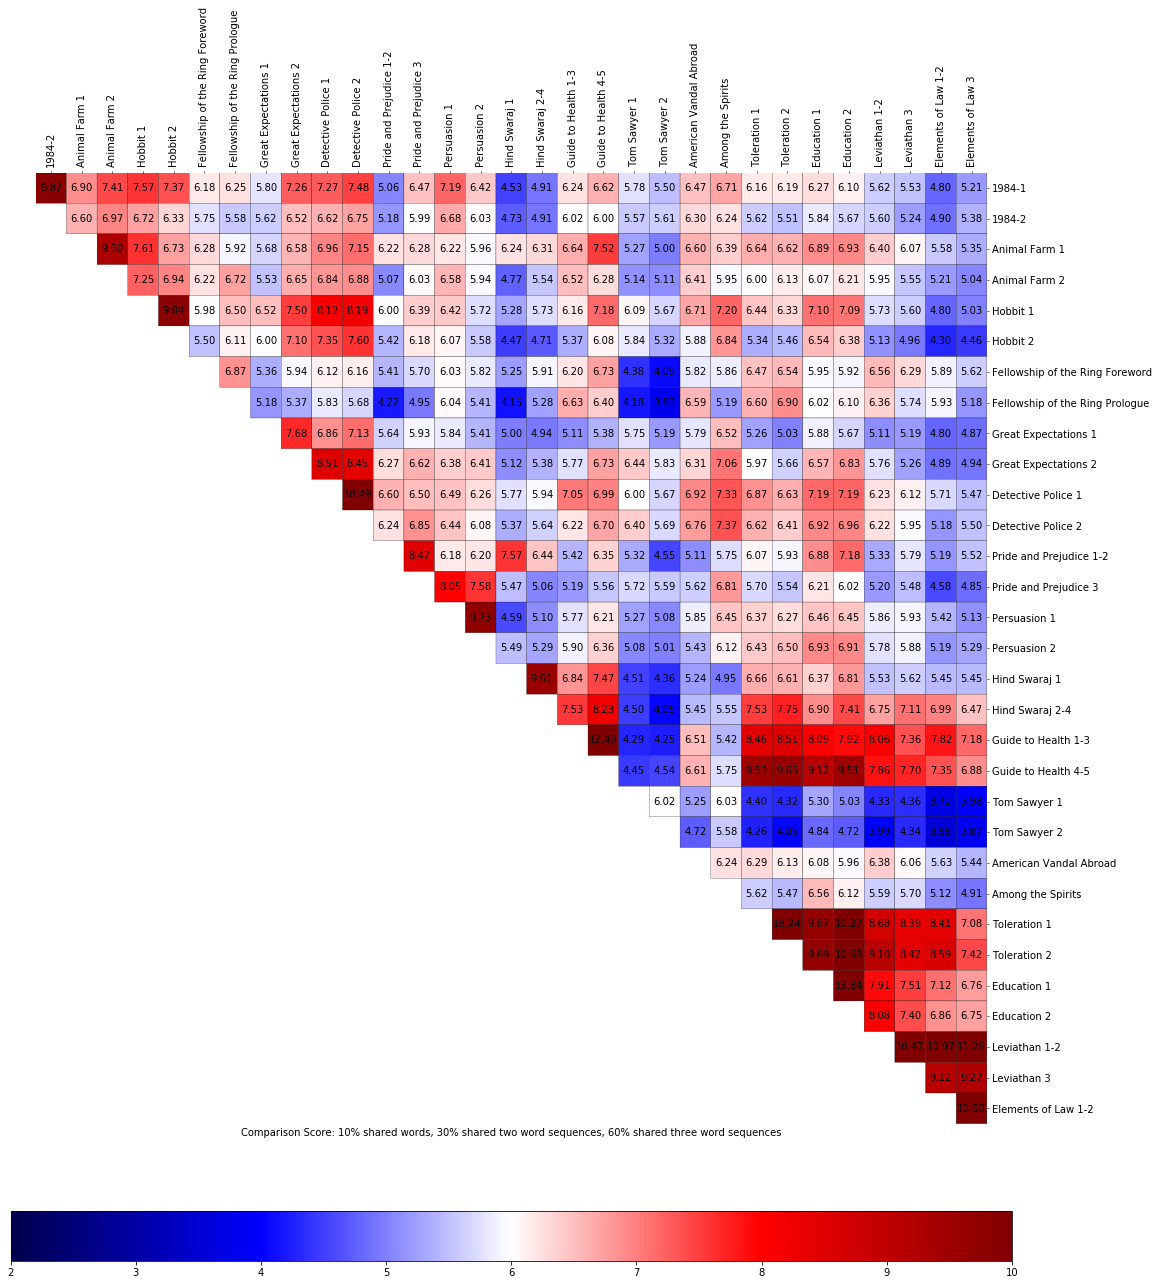

In [22]:

# comparisonarray = [[Wordicts().compare(i, j, [0.1, 0.3, 0.6]) if passages.index(i) < passages.index(j) < len(passages) else 0 for j in passages[1::]] for i in passages[:-1]]
data = np.array([[0.09872637515562711, 0.06899523174307542, 0.07410879356792295, 0.07569847093069837, 0.07374794879764224, 0.061828188784904196, 0.06246142360977851, 0.058029226561959586, 0.07264162065882648, 0.07272125437968296, 0.07484145348851967, 0.050551515744362126, 0.06473908269358959, 0.07194154570498676, 0.06416231159454316, 0.04530480278761758, 0.04908903238768156, 0.06242820062933968, 0.06618883358155003, 0.057795527092743694, 0.05498871482292509, 0.06468965645655649, 0.06707401393392691, 0.06159048963058035, 0.061856739370850844, 0.06266458312237598, 0.06101658607225857, 0.05622307811737514, 0.055256323113972446, 0.047956271310657425, 0.0521324610030299], [0, 0.06595182346562949, 0.06966975718743881, 0.06722094176425476, 0.06327257821880355, 0.057547988344445494, 0.05582007438864393, 0.05618470334214175, 0.06517093772011065, 0.0662420125756536, 0.0674959113396902, 0.05175878218901322, 0.059948822211658585, 0.06676182218509794, 0.06033636316677261, 0.04733335833831072, 0.049066898887189805, 0.06020427332519812, 0.05997973730108471, 0.05573990257219101, 0.05606323554002051, 0.06295374068435063, 0.06242152797319779, 0.056163836292636604, 0.05506410165260492, 0.05841394879329249, 0.05667266013201838, 0.055950912140918053, 0.05239199372375788, 0.04895135881217219, 0.05381280331160957], [0, 0, 0.09296746135750081, 0.07613757280728115, 0.06727920288382973, 0.06284241548338648, 0.059188172298646195, 0.05676795866071557, 0.06579219889004212, 0.06957412303263175, 0.07154443152203835, 0.06224528844653302, 0.06284268815668262, 0.062164588461471326, 0.05959363943778868, 0.062375180047520774, 0.06311055060357502, 0.06639588871112694, 0.0751768403687464, 0.05266681287138314, 0.04995962835294164, 0.06599450105984335, 0.06392406015972828, 0.06636942635314208, 0.06618554349637054, 0.06888905335572883, 0.06932463003350736, 0.06397109460826517, 0.06065366014200603, 0.05576658784531054, 0.05354403114697475], [0, 0, 0, 0.0724669648217661, 0.06944011149710912, 0.06220315360691679, 0.06719690523563543, 0.055286274378146906, 0.06645700108850265, 0.06838841615686492, 0.06878175742345277, 0.0506593873554536, 0.06031376804111788, 0.06577880412810057, 0.05938142778581548, 0.04765016590052849, 0.05537509317507407, 0.06519541459266802, 0.06275150401369267, 0.05142352152741288, 0.05107715566731838, 0.06405196910713748, 0.05950713353622896, 0.05998377007791458, 0.061263717304547376, 0.060666382237360185, 0.062063574183693314, 0.05949953401030995, 0.05545557275618006, 0.05213143399820404, 0.050399862396425237], [0, 0, 0, 0, 0.09843147137427816, 0.05978581015897085, 0.06501010649376485, 0.06517872739813943, 0.07504815855406179, 0.08124504002777005, 0.08188914185906385, 0.05996289169854159, 0.06388871314136464, 0.06421922185818889, 0.0571875992758683, 0.05284248745132245, 0.05729124893416612, 0.06159888916869301, 0.07184952094208064, 0.06085439676806259, 0.056749988695728434, 0.06706870003910768, 0.07198902437862341, 0.06438737160650106, 0.06328815931941215, 0.07100609036567149, 0.07093044259990577, 0.05734376089644676, 0.05599547535017434, 0.047971075648549764, 0.05025939499283008], [0, 0, 0, 0, 0, 0.055026816695531965, 0.061099680488303575, 0.05999757951187262, 0.07096820786560128, 0.0734866268539879, 0.07604527215230433, 0.05423953077152295, 0.061766250833141585, 0.06067845080241882, 0.05577067264725778, 0.044746411106131714, 0.04709126653322851, 0.05367036002439036, 0.060848789171353675, 0.05842816464120961, 0.05324240484014048, 0.05882292829546089, 0.06836608128434936, 0.053449135724670596, 0.054605905518751725, 0.06543136982621522, 0.0637738948372139, 0.051276646820318315, 0.04956800845226149, 0.04295744315356516, 0.04457937475849131], [0, 0, 0, 0, 0, 0, 0.06874186087904513, 0.053554956644362536, 0.05944817924848332, 0.061244088709742676, 0.06155183808680917, 0.05414308916495653, 0.05701758870642923, 0.060314338757249945, 0.05819230598895062, 0.052463797776168476, 0.059081556691861215, 0.061984754581676224, 0.06728930750014342, 0.043824559432511914, 0.04089364001846481, 0.05818871756258064, 0.05861960121787942, 0.06469256589526814, 0.06538624277880643, 0.05953876623339094, 0.059159524399776925, 0.06559787818310076, 0.06288453925814484, 0.05889753573174977, 0.05616086388059536], [0, 0, 0, 0, 0, 0, 0, 0.05176367008373912, 0.05372993708128692, 0.05829600449598817, 0.05684335364207367, 0.04218026798741749, 0.04946778084908883, 0.060413598445785, 0.05410505939840311, 0.04154565221318392, 0.05275872110427191, 0.06630472113718541, 0.06400737364220659, 0.04175373789814275, 0.03829975033338428, 0.06592880239126085, 0.05189730549459357, 0.06596908573102295, 0.06901623083629367, 0.0602181419391181, 0.060968027096094904, 0.06364194476111408, 0.05740069271595167, 0.059299878694781157, 0.051772101162427406], [0, 0, 0, 0, 0, 0, 0, 0, 0.07677750991330907, 0.06862364735753068, 0.0712769724349686, 0.05636420913705613, 0.05925428148066471, 0.058356712365928216, 0.05414932634445464, 0.04998091573091517, 0.04942015371207715, 0.05108877140508952, 0.05384091493723127, 0.05752680164596678, 0.05192525328735183, 0.05791759241784286, 0.06519159111431919, 0.05257776545379885, 0.05030256742266618, 0.05881366587002077, 0.05674213582244578, 0.051061739357679485, 0.05194570854864682, 0.04799971523241062, 0.0487157056564508], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.08514824604282069, 0.08450121166920553, 0.06267065462021024, 0.06622239193863631, 0.06377946017586957, 0.06410021441123545, 0.05120337342483908, 0.053835223888468536, 0.05771277440141711, 0.06729707101279662, 0.06436514278985157, 0.05834483005427706, 0.06313286220960306, 0.0706364049730406, 0.059700256533960834, 0.05655694686720088, 0.06571464977136875, 0.06826750579575233, 0.057586961996044794, 0.05259796036693867, 0.04889407211542581, 0.04936290441679765], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1048681071094403, 0.06595407101376112, 0.06501154731895485, 0.06490553991861726, 0.06262886227287416, 0.05765665836957279, 0.059438860466495325, 0.07049885226772902, 0.06992647104220437, 0.0600338213007944, 0.05671030579343818, 0.06920794717925127, 0.07326167156197737, 0.06868253913280338, 0.06628561882131491, 0.07185039206411244, 0.07187983270451076, 0.06227089580248224, 0.06120410398053928, 0.05705862245476656, 0.05473423467730416], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.06235581633644403, 0.06846643961249574, 0.06442280897809648, 0.06079270161838846, 0.05369105428937165, 0.05643507958744581, 0.0621565631731328, 0.06696059010744587, 0.0639879437415809, 0.0569407334647642, 0.06757734033041156, 0.0736966845589823, 0.06617473328216542, 0.06405255775381291, 0.06923468284490496, 0.06964010717858003, 0.062226593732790034, 0.059470934889665865, 0.051793994898573364, 0.05502328495265979], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0847147854015449, 0.061835689208362556, 0.0620341086745668, 0.07566558523378374, 0.06438063864390772, 0.05418987624170159, 0.06348392798735013, 0.05315788436613212, 0.045547566295911474, 0.05105669602383715, 0.05746397720990143, 0.06066793939696554, 0.05932962120162649, 0.0687546409796069, 0.0717973606587553, 0.0533387961463275, 0.05790438520967836, 0.051870269460305284, 0.055165667906387224], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.08050521356616548, 0.07580279158714834, 0.05473649256983708, 0.050559134849916545, 0.051895849825297644, 0.05560236740998662, 0.05716469649385021, 0.055930005709072694, 0.05616198848611282, 0.068076940368544, 0.05695430755107579, 0.055411728010340625, 0.06209003341462052, 0.060160014550059496, 0.05201628622671927, 0.05476284957756944, 0.04582267172510102, 0.04853034011496464], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.09727629222063153, 0.045887608692699866, 0.0509925177760287, 0.05770565145800592, 0.06209330981968865, 0.05271136199231973, 0.050813493668836994, 0.05853607532667796, 0.0644952040129144, 0.06365818879056509, 0.06265995545240777, 0.06459415958728029, 0.0644566576897285, 0.058598903404441134, 0.059295613043976056, 0.0541728532611135, 0.05132368109014942], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.054878585461784375, 0.052901407096483555, 0.05899118072638327, 0.06358658280285606, 0.05084296693320655, 0.05011228295822739, 0.054331600755670076, 0.06115439266318404, 0.06430437268097708, 0.0650067612782119, 0.06926634117758361, 0.06914635730209232, 0.057774945437073615, 0.05877463588082497, 0.05186445208036546, 0.052885054015889214], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.09607415981648529, 0.06838351217070329, 0.07467576700879544, 0.04510101999357188, 0.04363373296136036, 0.05238208154684117, 0.04953471414290149, 0.06655787785848596, 0.06606265975646979, 0.06372490252153222, 0.06806027832803108, 0.05529030161067788, 0.05617152030738098, 0.0545019300732353, 0.05450698001760947], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0753219923237716, 0.08233449130879172, 0.04495937004225369, 0.040453164994129626, 0.0544551860683554, 0.05547685931529765, 0.07529736530263288, 0.07746893640518114, 0.06895215108637615, 0.07414442617030702, 0.06747158996561703, 0.07111080390695185, 0.06994799891722779, 0.06472317727752228], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.12488719656598013, 0.04292292246179496, 0.04249301314818911, 0.06511484729886151, 0.054218732230855465, 0.08463884719781338, 0.08509569190465403, 0.08093174783930665, 0.0791936871373614, 0.08063771572012202, 0.07361459892523495, 0.0781574733327818, 0.07179207532269996], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0445109354105677, 0.04539100607018387, 0.06606707728704414, 0.05748470386564629, 0.09526729407896652, 0.09649847195433248, 0.09117802954799151, 0.09507182319951642, 0.07855216633246932, 0.07700443636596158, 0.07352604114394375, 0.06877221344633314], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.060211416324871515, 0.05246941550727754, 0.060269501307017005, 0.04402469976990679, 0.043154449644155345, 0.052970078100161244, 0.05032485514169442, 0.043263266032352005, 0.043631817249569924, 0.03716401180023246, 0.03980503722324193], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.04724655697080605, 0.05575725102996214, 0.04257769318724683, 0.04046991218684274, 0.0484115535018207, 0.04719405020007528, 0.03991152362700741, 0.04340329601448389, 0.03547976849065909, 0.038657146899123127], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.06241394874433664, 0.0629055537026425, 0.06129397090790184, 0.060797152612176275, 0.05961415573901786, 0.06376262361939068, 0.06058161506523626, 0.056325335241268516, 0.054372412204970036], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.05618444445413787, 0.0546609603776662, 0.0655580954686984, 0.061204252489186234, 0.05594937773368384, 0.05700976465843899, 0.051193110059110994, 0.04911503809859473], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.18236340945669385, 0.09669902452272869, 0.10267108628147978, 0.08677020051463881, 0.08387971681522835, 0.08414289847603164, 0.07078189730071233], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.09694241155924109, 0.10586276182715831, 0.09102122358930241, 0.08422402218238556, 0.08594846371378925, 0.07419871155059982], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.13339782705751657, 0.07911132916612731, 0.07512140054952615, 0.07124265060517872, 0.06759319210370722], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.08079867833874838, 0.07401071983731951, 0.06858234859358853, 0.06747775215443577], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.10474559798107166, 0.10972284262789572, 0.1126271631431948], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.09115473830167761, 0.09269980587768602], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.10599053397477116]])
data = data*100  # Express in percentages instead of decimal
# x and y labels have different starting and ending points in a correlogram.
xlabels = ['1984-2', 'Animal Farm 1', 'Animal Farm 2', 'Hobbit 1', 'Hobbit 2', 'Fellowship of the Ring Foreword', 'Fellowship of the Ring Prologue', 'Great Expectations 1', 'Great Expectations 2', 'Detective Police 1', 'Detective Police 2', 'Pride and Prejudice 1-2', 'Pride and Prejudice 3', 'Persuasion 1', 'Persuasion 2', 'Hind Swaraj 1', 'Hind Swaraj 2-4', 'Guide to Health 1-3', 'Guide to Health 4-5', 'Tom Sawyer 1', 'Tom Sawyer 2', 'American Vandal Abroad', 'Among the Spirits', 'Toleration 1', 'Toleration 2', 'Education 1', 'Education 2', 'Leviathan 1-2', 'Leviathan 3', 'Elements of Law 1-2', 'Elements of Law 3']
ylabels = ['1984-1', '1984-2', 'Animal Farm 1', 'Animal Farm 2', 'Hobbit 1', 'Hobbit 2', 'Fellowship of the Ring Foreword', 'Fellowship of the Ring Prologue', 'Great Expectations 1', 'Great Expectations 2', 'Detective Police 1', 'Detective Police 2', 'Pride and Prejudice 1-2', 'Pride and Prejudice 3', 'Persuasion 1', 'Persuasion 2', 'Hind Swaraj 1', 'Hind Swaraj 2-4', 'Guide to Health 1-3', 'Guide to Health 4-5', 'Tom Sawyer 1', 'Tom Sawyer 2', 'American Vandal Abroad', 'Among the Spirits', 'Toleration 1', 'Toleration 2', 'Education 1', 'Education 2', 'Leviathan 1-2', 'Leviathan 3', 'Elements of Law 1-2',]
mask = np.tri(data.shape[0], k=-1)
# Covers up the entire left side of the graph with white boxes.
data = np.ma.masked_where(mask, data)


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30.67
fig_size[1] = 20.02
fig, ax = plt.subplots()
# Subplot container treats the correlogram and the colorbar key as separate subplots.
im = ax.pcolor(data, cmap='seismic', vmin=2, vmax=10, edgecolors='black')  # Correlogram
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=True)
# The next six lines set and place the x and y tick labels.
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=True)
ax.yaxis.tick_right()
ax.xaxis.tick_top()
ax.set_xticklabels(xlabels, minor=True, rotation=90)
ax.set_yticklabels(ylabels, minor=True, rotation=0)
xlabel = 'Comparison Score: 10% shared words, 30% shared two word sequences, 60% shared three word sequences'
xlabelwrap = '\n'.join(wrap(xlabel, 300))  # Line breaks for formatting
ax.set_xlabel(xlabelwrap)



for y in range(data.shape[0]):  # Place the numbers in the middle of the squares
    for x in range(data.shape[1]):
        if data[y,x]>0:  
          plt.text(x + 0.5, y + 0.5, '%.2f' % data[y, x],
                  horizontalalignment='center',
                  verticalalignment='center',
                  )
cbar = fig.colorbar(im, fraction=0.046, pad=0.08, orientation='horizontal')  # Set the location of the colorbar
cbar.set_ticks(range(11)) # Integer colorbar tick locations
ax.set(frame_on=False, aspect=1, xticks=[], yticks=[])
ax.invert_yaxis()
# Default puts the right angle of the triangle in the lower right. This moves the right angle to the upper right.


plt.show()

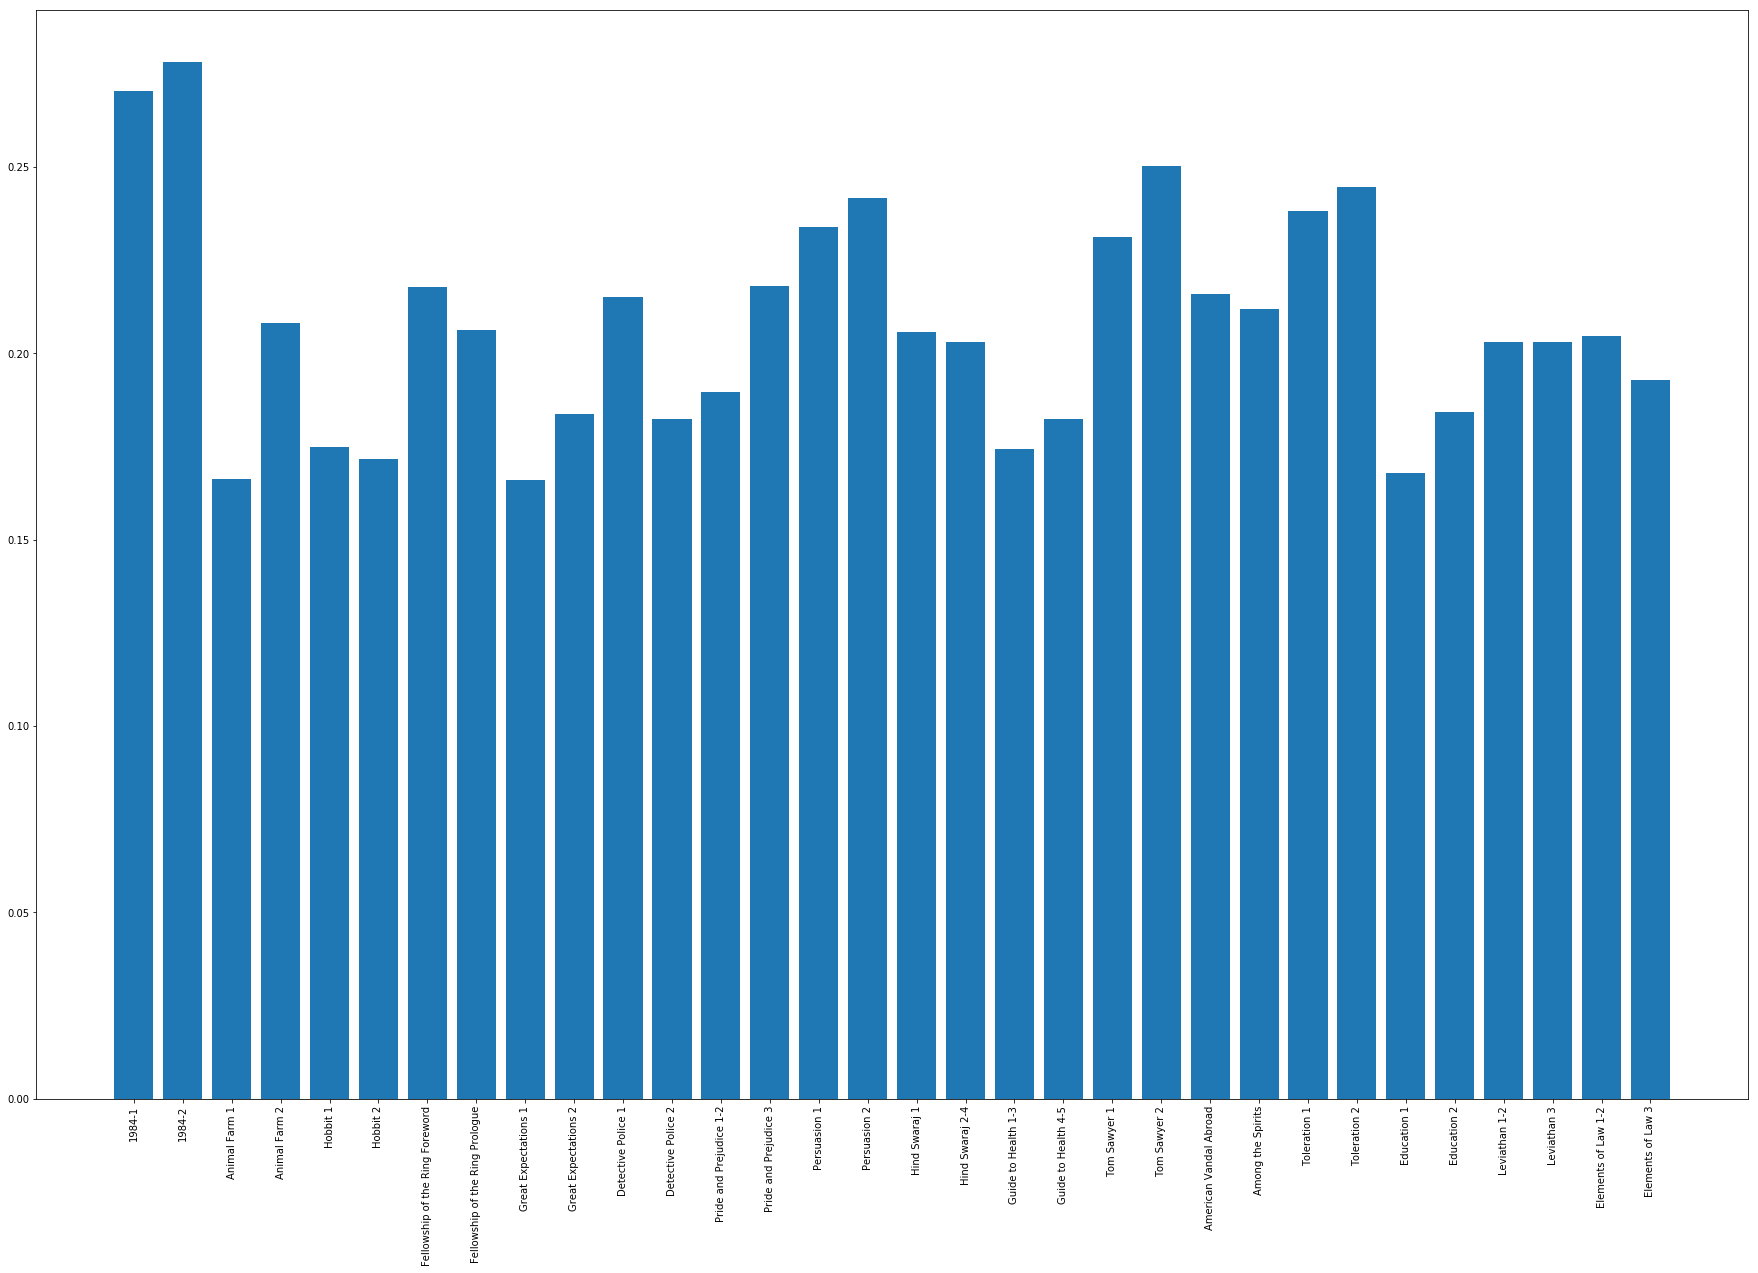

In [8]:
longwords7 = [Wordicts().longwords7(i) for i in passages]
yvalues = longwords7
xvalues = ['1984-1'] + xlabels
plt.xticks(rotation='vertical')
plt.bar(xvalues, yvalues)
plt.show()

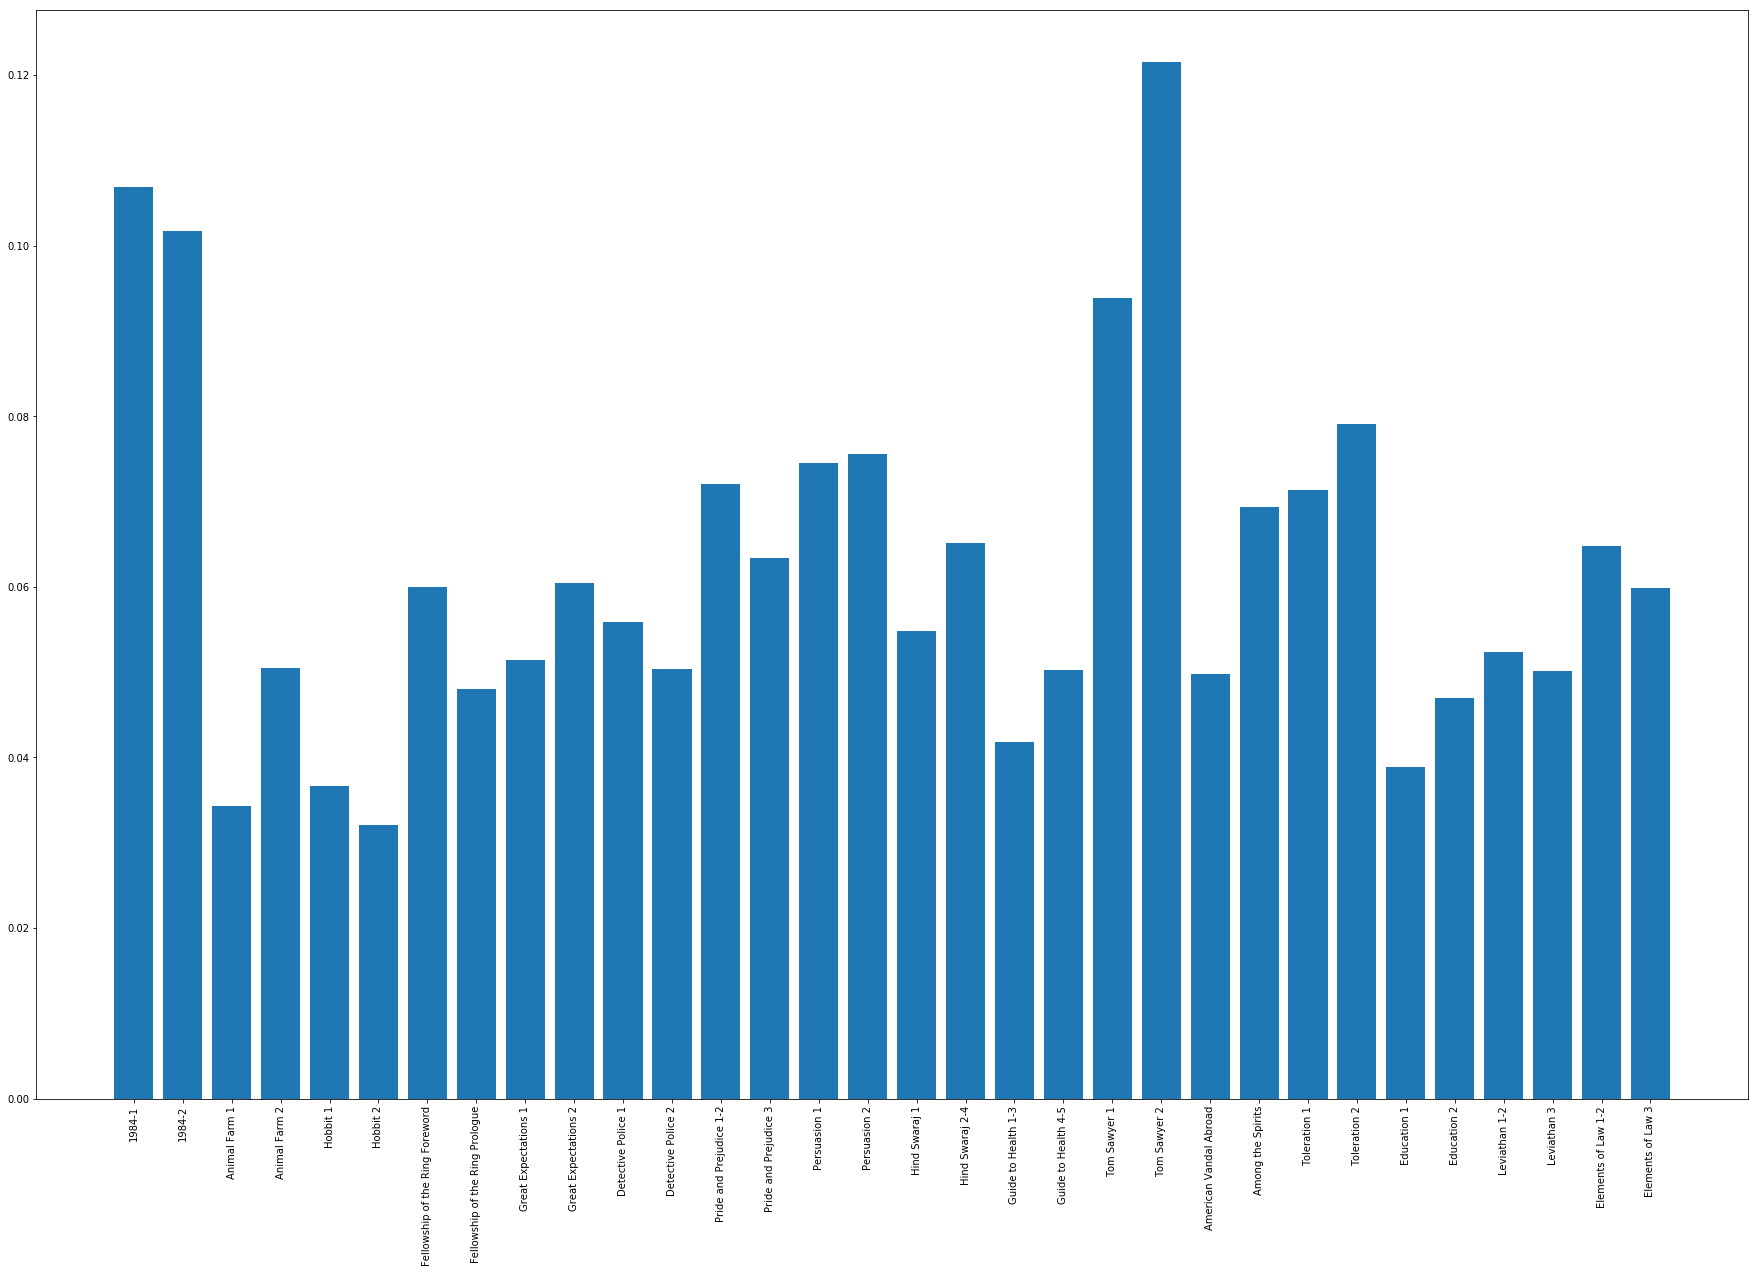

In [9]:
longwords10 = [Wordicts().longwords10(i) for i in passages]
yvalues = longwords10
xvalues = ['1984-1'] + xlabels
plt.xticks(rotation='vertical')
plt.bar(xvalues, yvalues)
plt.show()

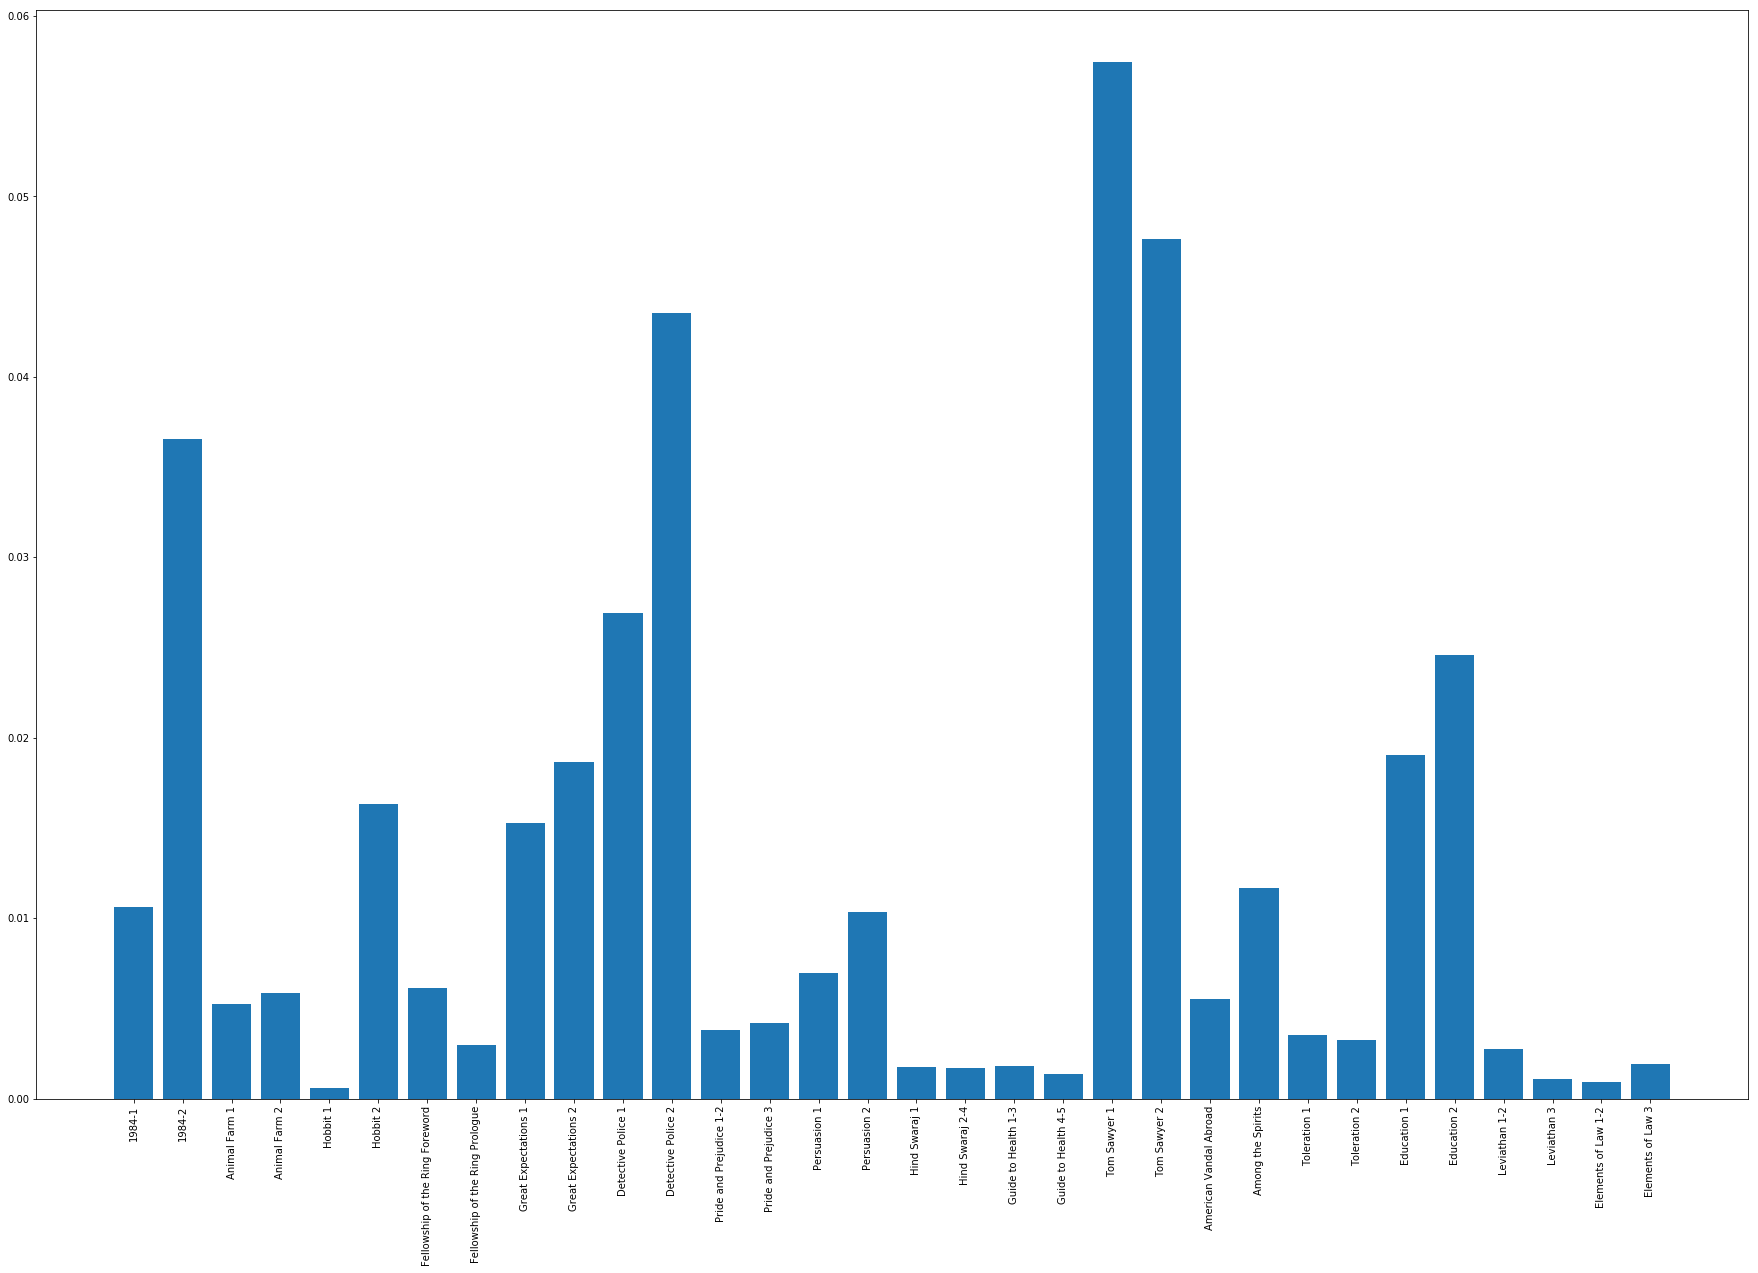

In [10]:
apostrophe = [Wordicts().apostrophe(i) for i in passages]
yvalues = apostrophe
xvalues = ['1984-1'] + xlabels
plt.xticks(rotation='vertical')
plt.bar(xvalues, yvalues)
plt.show()

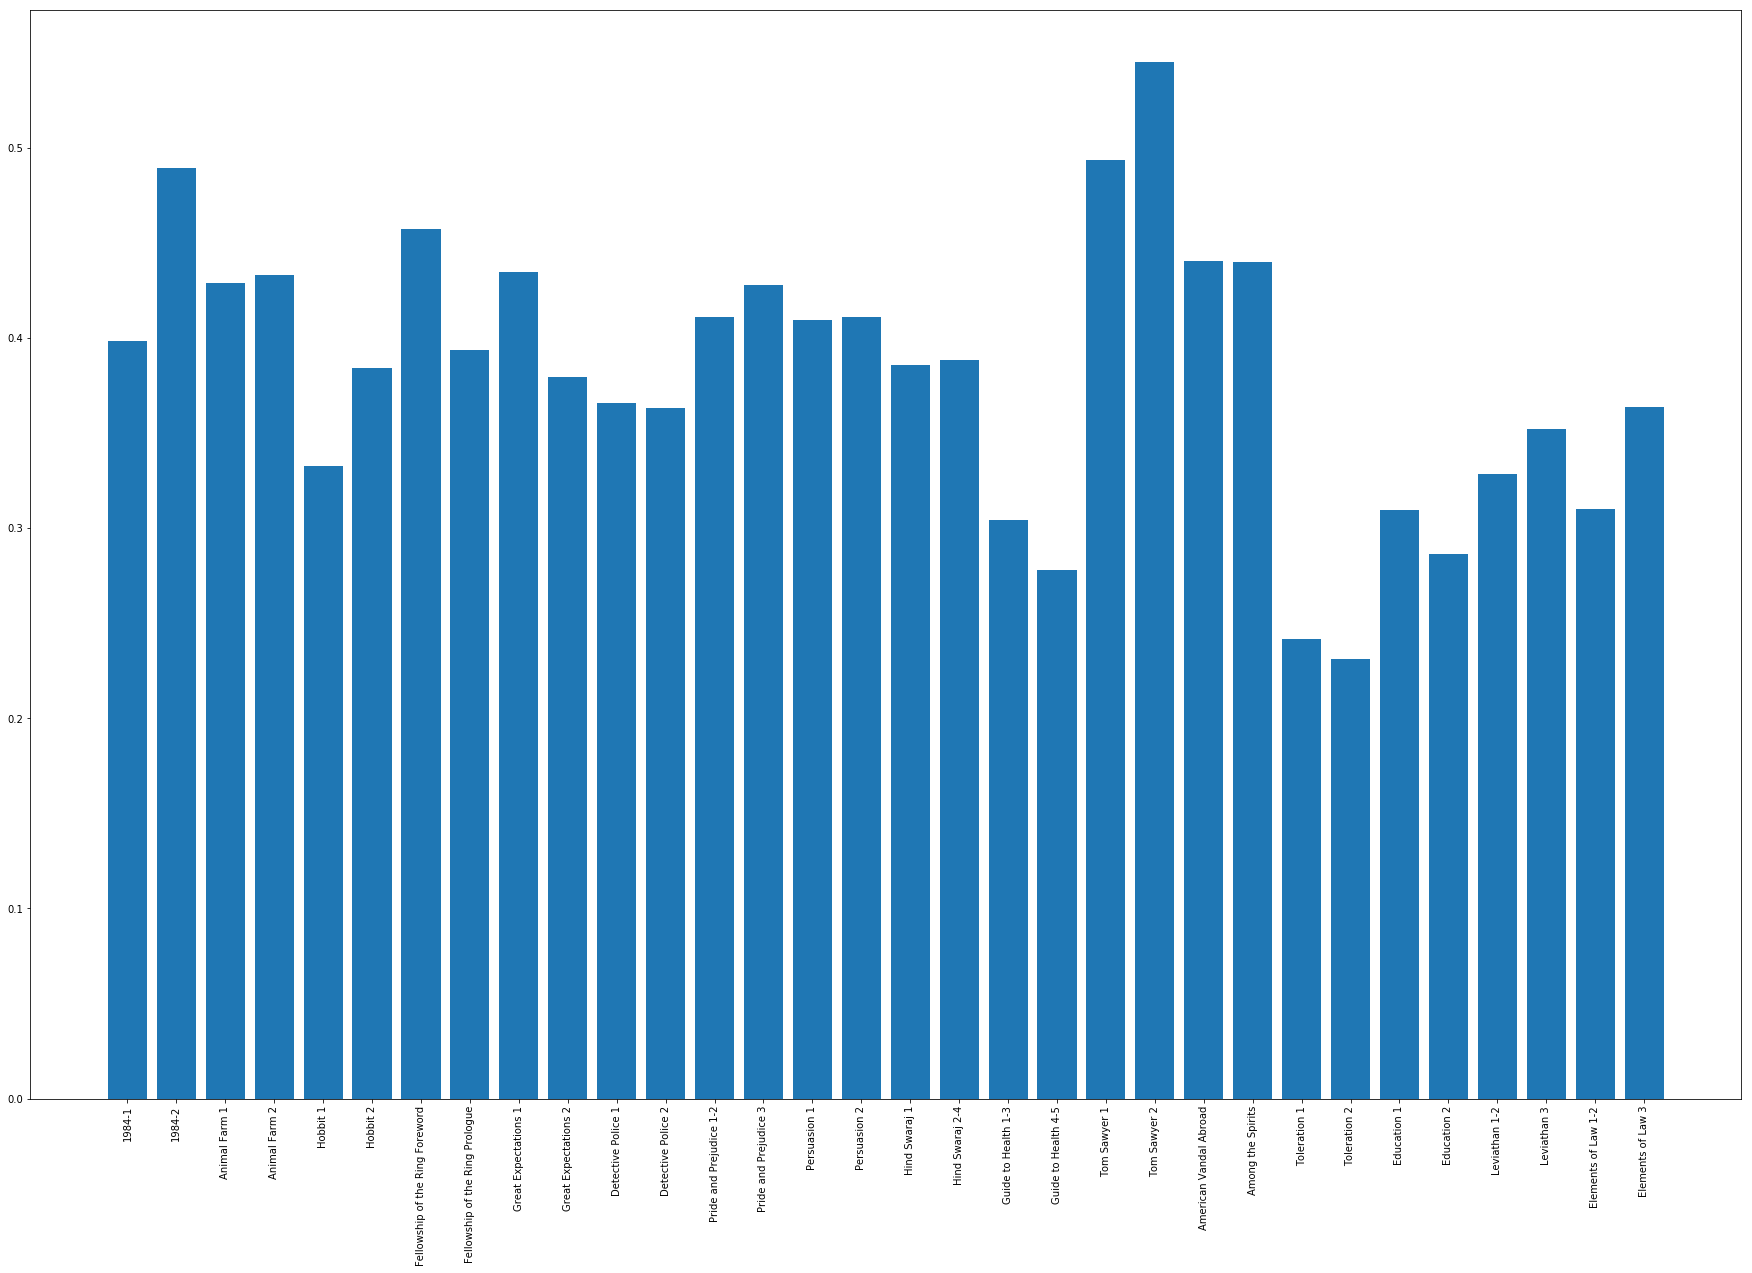

In [11]:
uniquewords = [Wordicts().uniquewords(i) for i in passages]
yvalues = uniquewords
xvalues = ['1984-1'] + xlabels
plt.xticks(rotation='vertical')
plt.bar(xvalues, yvalues)
plt.show()

[0.06873151209326606, 0.06476190476190476, 0.07677972418934029, 0.0564042303172738, 0.06659051970302685, 0.07254082795290544, 0.056666666666666664, 0.07551622418879056, 0.09881422924901186, 0.10216346153846154, 0.09672505712109672, 0.1176039119804401, 0.08149084017687934, 0.07232516437537358, 0.09581070597362297, 0.08639420589756855, 0.05014577259475218, 0.049170954831332186, 0.060083594566353184, 0.06424426637192594, 0.07142857142857142, 0.09172126265634306, 0.06000789577575997, 0.05167173252279635, 0.07924802658911508, 0.06964831051127968, 0.09646710387137719, 0.09545454545454546, 0.10378340853870184, 0.08135775862068965, 0.09119927040583675, 0.08211330362826226]


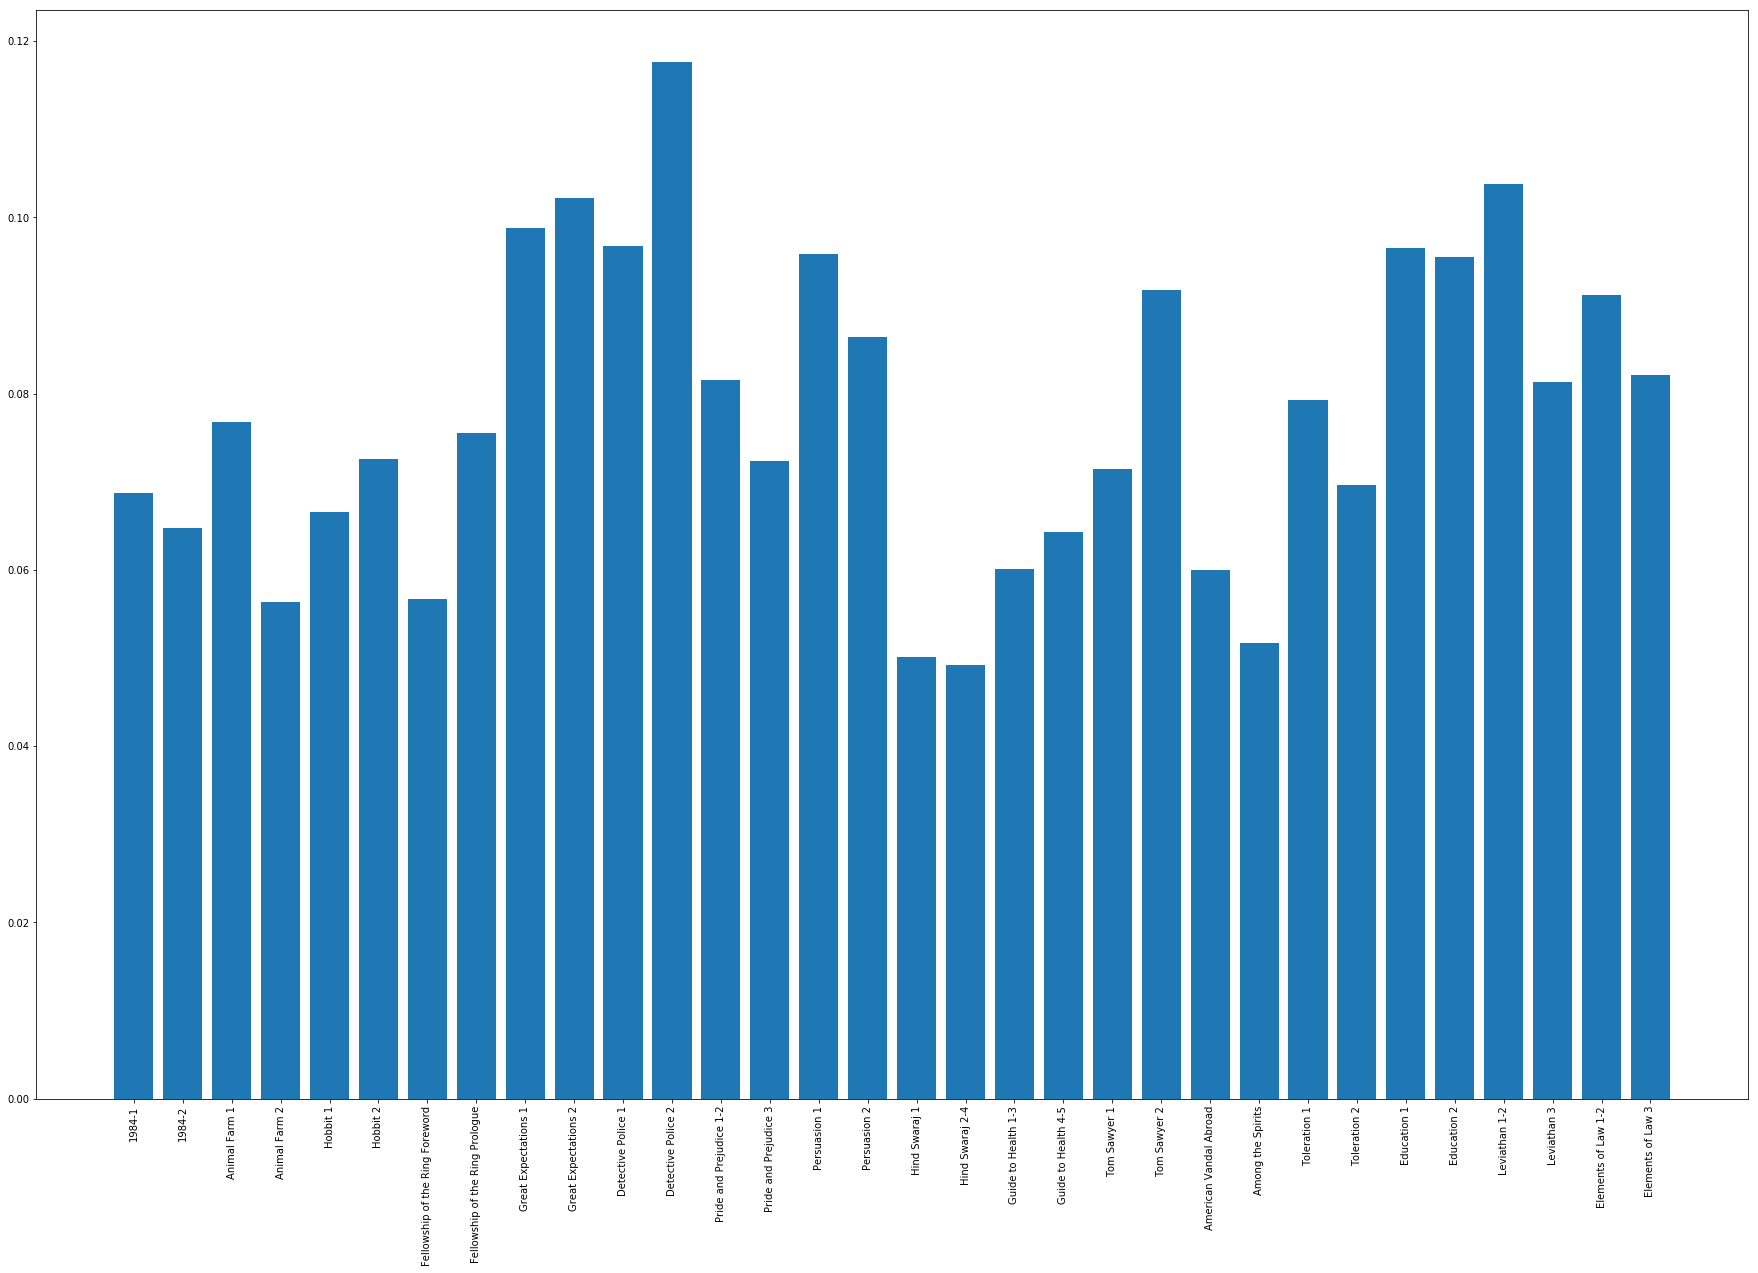

In [12]:
comma = [Wordicts().comma(i) for i in passages]
print(comma)
yvalues = comma
xvalues = ['1984-1'] + xlabels
plt.xticks(rotation='vertical')
plt.bar(xvalues, yvalues)
plt.show()
        

[0.053419176, 0.06209524, 0.049198657, 0.059146103, 0.045459736, 0.055070262, 0.033333335, 0.03864307, 0.049689442, 0.047175482, 0.04645849, 0.038875304, 0.076437145, 0.06276151, 0.033359192, 0.036730472, 0.06530612, 0.06918239, 0.046499476, 0.045316387, 0.07096172, 0.053603336, 0.030398736, 0.04052685, 0.025238886, 0.0284701, 0.032578804, 0.02946128, 0.024297118, 0.028017242, 0.036023714, 0.032463398]
[0.05341917522185488, 0.06209523809523809, 0.049198658218412225, 0.05914610262436349, 0.04545973729297544, 0.05507026205848842, 0.03333333333333333, 0.03864306784660767, 0.049689440993788817, 0.04717548076923077, 0.046458492003046456, 0.038875305623471884, 0.0764371446620341, 0.06276150627615062, 0.03335919317300233, 0.03673047077082255, 0.0653061224489796, 0.06918238993710692, 0.04649947753396029, 0.04531638574191766, 0.07096171802054155, 0.05360333531864205, 0.030398736675878404, 0.040526849037487336, 0.025238886580805982, 0.02847010146783568, 0.032578802623228265, 0.029461279461279462

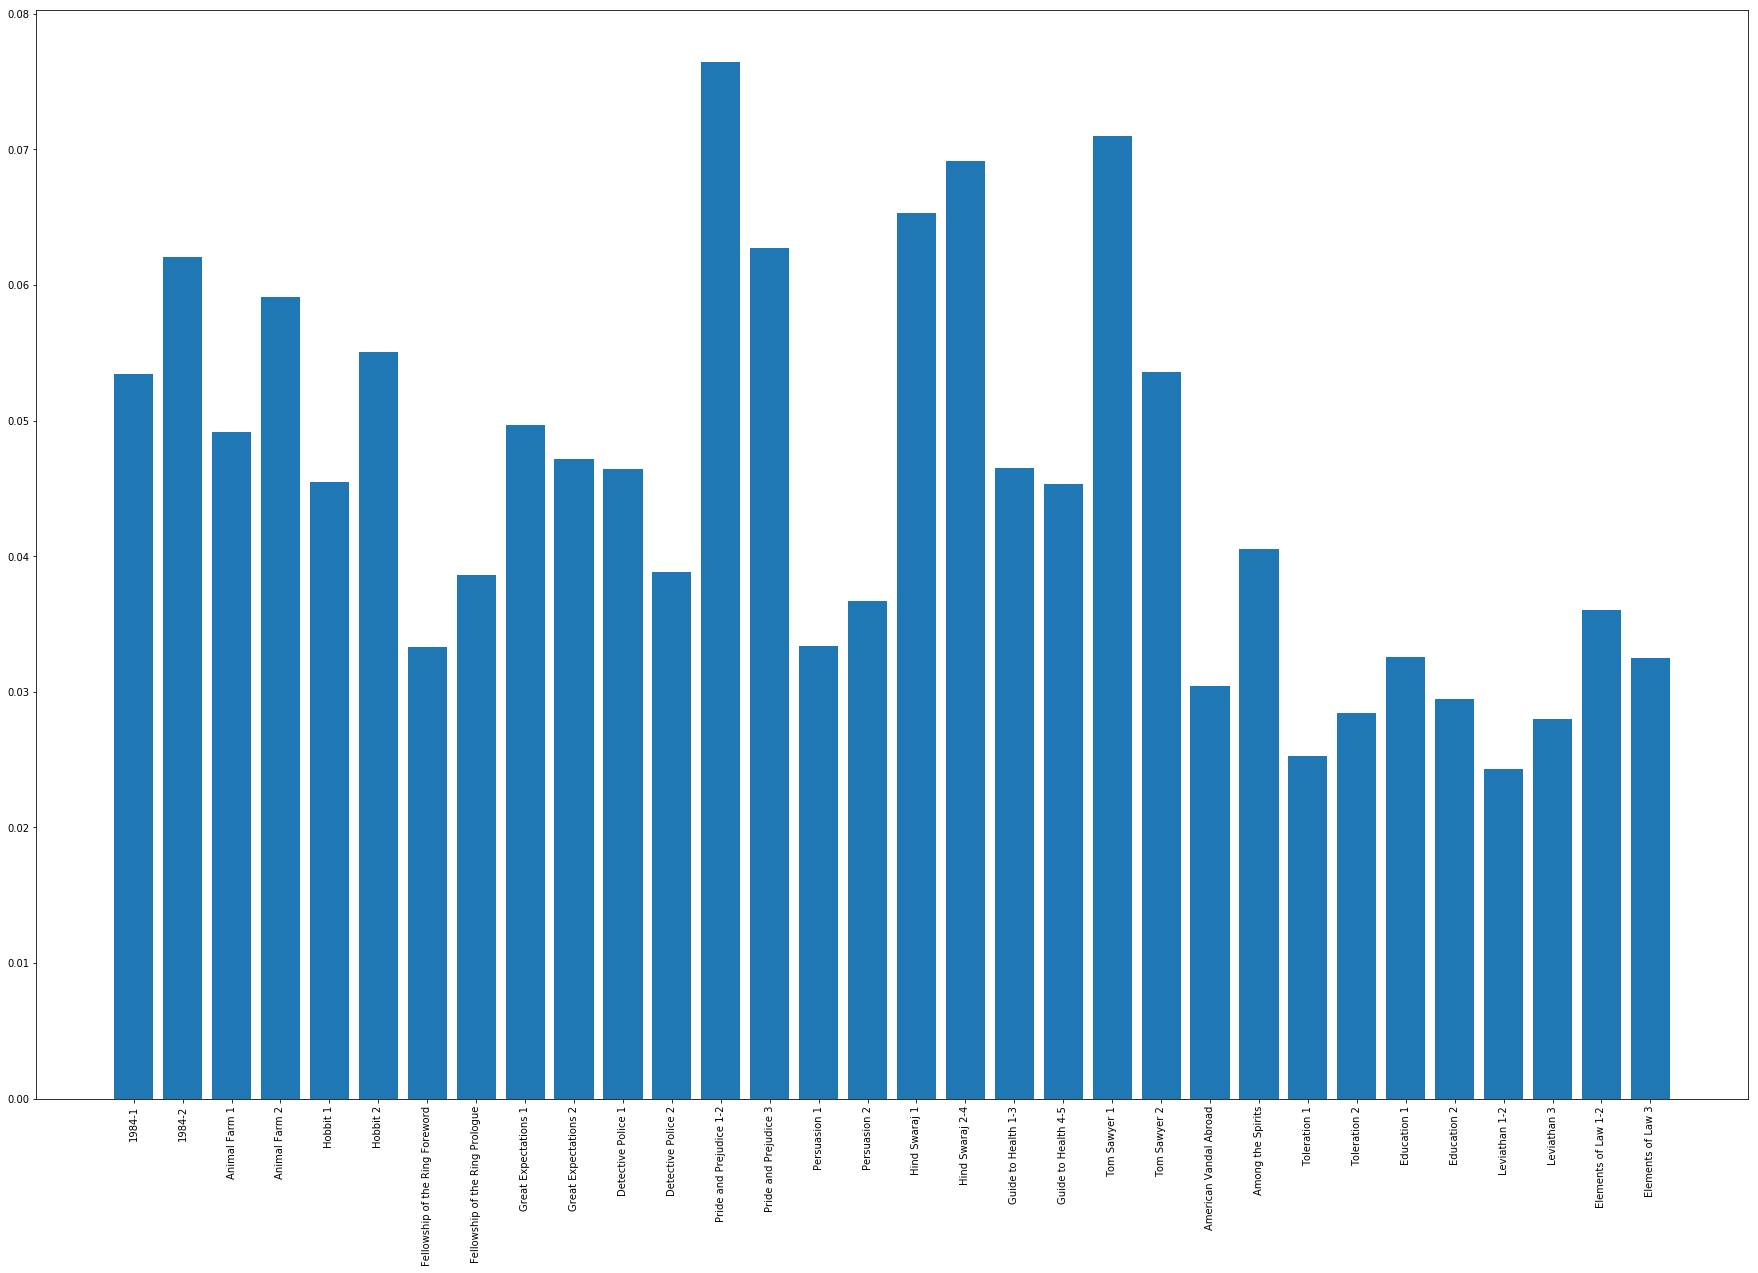

In [23]:
period = [Wordicts().period(i) for i in passages]
period32 = [np.float32(i) for i in period]
print(period32)
print(period)
yvalues = period
xvalues = ['1984-1'] + xlabels
plt.xticks(rotation='vertical')
plt.bar(xvalues, yvalues)
plt.show()

In [15]:
labels = [[1 if j - (j % 4) == i - (i % 4) else 0 for j in range(32)]for i in range(32)]  # modulo operation, returns 1 for a pair written by the same author and 0 for different authors


In [16]:
features = {
        'onewordsimilarity': np.array([[1, 0.5220249405486889, 0.4238416115076251, 0.4328419855084037, 0.4255571178248378, 0.41384514029380653, 0.3911692090559312, 0.3905774617307048, 0.3932053224538517, 0.42929933761427225, 0.4287487013213895, 0.4288847630931479, 0.34329515325142523, 0.4068799220695818, 0.43105344671345286, 0.40801818281491964, 0.32188435492519574, 0.349828179924932, 0.3777800838891164, 0.4011986406834411, 0.3812406814126369, 0.3693929235472358, 0.4087280539990265, 0.39799858575611924, 0.38364316304115115, 0.3746382983916915, 0.38417924948949966, 0.3728310305654992, 0.3744291197731571, 0.37884158451485844, 0.3242022186321201, 0.3644114212524127], [0.5220249405486889, 1, 0.4201669062705218, 0.4372527558614509, 0.4157134698539617, 0.40349722388005776, 0.37719047619047524, 0.374267172355667, 0.3828752117447762, 0.41240899725274777, 0.41706190838864093, 0.4209528466643369, 0.3495905905002548, 0.3969013747758513, 0.40880387158742415, 0.3903831695119838, 0.3339319727891149, 0.3471364861553539, 0.3847216002388407, 0.37619821313438334, 0.3790550887021465, 0.36803811792733726, 0.3991875622732308, 0.38977507598784084, 0.35496504243575233, 0.3532068058037911, 0.3761374071947373, 0.36498508898508847, 0.3657544833969678, 0.36623070607553326, 0.31809628037261384, 0.3618923948955774], [0.4238416115076251, 0.4201669062705218, 1, 0.47801224550159194, 0.46558535423983405, 0.4323878001890918, 0.41680954155795763, 0.39574618734586897, 0.39419116915106206, 0.41878070884343144, 0.45077442174677146, 0.4411236372815531, 0.4113946895228822, 0.4083215053761054, 0.39712993369452376, 0.39225920749120896, 0.40306453873813, 0.4152428723979867, 0.4227785261978843, 0.45573919977770944, 0.369353605524705, 0.35311316459467224, 0.42843691744558937, 0.4123034785797178, 0.42334090174622707, 0.4146266882559385, 0.43749702839517857, 0.4364483447972085, 0.41557349467762295, 0.4132053108974779, 0.37330652081581767, 0.3841062132250286], [0.4328419855084037, 0.4372527558614509, 0.47801224550159194, 1, 0.43681329878534086, 0.4248984944917849, 0.4107011359185273, 0.427561189508092, 0.37890742238568365, 0.41349284589773855, 0.4282860628103858, 0.4228201732081822, 0.3426452077609761, 0.4001944198415008, 0.40684152294096065, 0.3875711785471339, 0.3299453338495043, 0.36699903722053084, 0.4074053268206191, 0.406095554569191, 0.3494499248974955, 0.3441291201862975, 0.41095533474393464, 0.37859982355819555, 0.3857313039995798, 0.38355628289367977, 0.3935105072235905, 0.3941500789326879, 0.3836999246654711, 0.37862403257830607, 0.33565886114509247, 0.35645063046607395], [0.4255571178248378, 0.4157134698539617, 0.46558535423983405, 0.43681329878534086, 1, 0.5566471375588551, 0.39698997398312086, 0.41169950925640486, 0.44098998362152364, 0.4570848937969524, 0.47599954126239064, 0.47861271030595226, 0.3957419512647409, 0.41534008574384834, 0.4017960699837271, 0.37943990618914697, 0.3592379531562972, 0.3730590605907141, 0.380809025682891, 0.4206946206399415, 0.4106850507193173, 0.38275720263992824, 0.42862716990099714, 0.4472572338168897, 0.3861569280726758, 0.3778459144699165, 0.4290527809851357, 0.4158017448422935, 0.37479914784649293, 0.3716792990212496, 0.3179985744580066, 0.34890710809609266], [0.41384514029380653, 0.40349722388005776, 0.4323878001890918, 0.4248984944917849, 0.5566471375588551, 1, 0.37255791872388905, 0.38663256354842734, 0.41582202866239976, 0.43986299081188623, 0.44841475879745024, 0.4516967732290098, 0.37286119443700055, 0.405450930974262, 0.3891764932584199, 0.3733410497389869, 0.32719220833577856, 0.34033934425553175, 0.3529903987687822, 0.3836341031272799, 0.4091134111576016, 0.3741767057462588, 0.38559259326454115, 0.43023336800356804, 0.3524616690369008, 0.35148971382859473, 0.41373858877788494, 0.4048709656381518, 0.3518138074235471, 0.3500329864976364, 0.2971340118378936, 0.32489194218317546], [0.3911692090559312, 0.37719047619047524, 0.41680954155795763, 0.4107011359185273, 0.39698997398312086, 0.37255791872388905, 1, 0.4443215339233027, 0.3627200577200573, 0.3876949786324789, 0.41303588051112794, 0.3994756859549033, 0.35968344212816694, 0.37484492262734914, 0.41067494181536085, 0.4000158073231009, 0.360643019112406, 0.4022393748808837, 0.4108533611981878, 0.4343501888182743, 0.3193464052287579, 0.30502911786116066, 0.39529214370311894, 0.38852077001013097, 0.4161450399298339, 0.41555862038770114, 0.40729391439249685, 0.4036700336700332, 0.42300782907169526, 0.4271431992337167, 0.3880156558747529, 0.39129641417356237], [0.3905774617307048, 0.374267172355667, 0.39574618734586897, 0.427561189508092, 0.41169950925640486, 0.38663256354842734, 0.4443215339233027, 1, 0.3602236291347483, 0.3511636317222599, 0.37733983064746224, 0.3665397292482559, 0.29826307168532895, 0.3458454333708895, 0.3911293884491189, 0.37114165243626024, 0.2939979531635662, 0.3575125103093042, 0.39624009395141435, 0.40264345583494515, 0.3009237913454462, 0.28274011254767784, 0.4210615742406717, 0.347567940751898, 0.3979014624258398, 0.40688886893454557, 0.3835539638292046, 0.3899541134054402, 0.41029356203137374, 0.39060910639812807, 0.359507927476403, 0.35924246435673113], [0.3932053224538517, 0.3828752117447762, 0.39419116915106206, 0.37890742238568365, 0.44098998362152364, 0.41582202866239976, 0.3627200577200573, 0.3602236291347483, 1, 0.4756369649372374, 0.45694999504728323, 0.4577326362380047, 0.3930996082387217, 0.40510880787395254, 0.38461984940549426, 0.3620256573764296, 0.3455997418730334, 0.34953069899747513, 0.3461175256527578, 0.36802743972031693, 0.41652181294124985, 0.37680128091087, 0.40711016613452333, 0.43644452987653654, 0.35913485910776444, 0.3412381008377119, 0.4060836285705447, 0.38826777087646636, 0.36324731966341894, 0.3662533587102556, 0.317555499081699, 0.3489690504884373], [0.42929933761427225, 0.41240899725274777, 0.41878070884343144, 0.41349284589773855, 0.4570848937969524, 0.43986299081188623, 0.3876949786324789, 0.3511636317222599, 0.4756369649372374, 1, 0.4862869700431597, 0.49394909605980863, 0.4176751026531907, 0.44277861913191535, 0.41232115682998266, 0.4158285434657173, 0.36038857507288635, 0.35785782122751536, 0.3697966903785868, 0.40892825591961335, 0.4310330702793943, 0.4065060976657359, 0.39735906704576635, 0.439076686832671, 0.37715379921542974, 0.36700349956048345, 0.4179618212071418, 0.4196714743589749, 0.37552659750220346, 0.37189157824933766, 0.3262096234960894, 0.34445654103217016], [0.4287487013213895, 0.41706190838864093, 0.45077442174677146, 0.4282860628103858, 0.47599954126239064, 0.44841475879745024, 0.41303588051112794, 0.37733983064746224, 0.45694999504728323, 0.4862869700431597, 1, 0.5669893131874776, 0.4248703017928017, 0.43295583409092747, 0.41699395218509855, 0.40252298141589393, 0.3886788095719192, 0.3912979106328635, 0.41406607504251763, 0.4327862643641041, 0.4173900583335647, 0.39239740164972725, 0.43713963245454573, 0.4578831743356706, 0.4228348380522116, 0.412692361587803, 0.45010554170907613, 0.4398971948476902, 0.4064614669087129, 0.4139259209409011, 0.36045174547971515, 0.3769300741463273], [0.4288847630931479, 0.4209528466643369, 0.4411236372815531, 0.4228201732081822, 0.47861271030595226, 0.4516967732290098, 0.3994756859549033, 0.3665397292482559, 0.4577326362380047, 0.49394909605980863, 0.5669893131874776, 1, 0.408424009996185, 0.43770556969092067, 0.4146754273986584, 0.39467263346559595, 0.3710151332625259, 0.38222791647619825, 0.3864849915562329, 0.42000917461563647, 0.42071915970952334, 0.400633454247857, 0.4126788011934399, 0.45372730583155574, 0.39963182973864925, 0.39123243906980193, 0.42925523303418023, 0.4306549603615613, 0.3913249185923454, 0.39565171570693897, 0.33523748044734464, 0.3720339154510469], [0.34329515325142523, 0.3495905905002548, 0.4113946895228822, 0.3426452077609761, 0.3957419512647409, 0.37286119443700055, 0.35968344212816694, 0.29826307168532895, 0.3930996082387217, 0.4176751026531907, 0.4248703017928017, 0.408424009996185, 1, 0.47120160068933287, 0.393879500334969, 0.39213526805599636, 0.43659803782536283, 0.40842289809500393, 0.36016062777776636, 0.4055511228465893, 0.38006704050329276, 0.3344946699540268, 0.344189734045034, 0.38930384320231143, 0.3920262705034089, 0.3732775332529343, 0.4378533500845469, 0.43183349604701454, 0.3666108775051124, 0.3816054060382951, 0.3357547517383601, 0.35998452687751314], [0.4068799220695818, 0.3969013747758513, 0.4083215053761054, 0.4001944198415008, 0.41534008574384834, 0.405450930974262, 0.37484492262734914, 0.3458454333708895, 0.40510880787395254, 0.44277861913191535, 0.43295583409092747, 0.43770556969092067, 0.47120160068933287, 1, 0.4737752939141593, 0.4482466884504165, 0.3620771679861422, 0.356665938729569, 0.3439352092143894, 0.38183644896010305, 0.38884982165809134, 0.3839867111290382, 0.37643689078226067, 0.4230562161658035, 0.37435654773596955, 0.3663375793009127, 0.41571235988245786, 0.3984926974466725, 0.3590932035495247, 0.3775529067131116, 0.3140964471806044, 0.35205341281741787], [0.43105344671345286, 0.40880387158742415, 0.39712993369452376, 0.40684152294096065, 0.4017960699837271, 0.3891764932584199, 0.41067494181536085, 0.3911293884491189, 0.38461984940549426, 0.41232115682998266, 0.41699395218509855, 0.4146754273986584, 0.393879500334969, 0.4737752939141593, 1, 0.5345875021120662, 0.3237194290328345, 0.3438540298545866, 0.3841499449161095, 0.4074580735112571, 0.35710772542790054, 0.34830824436023744, 0.3893230000150084, 0.40239286048341416, 0.404069153745073, 0.4033745218343436, 0.4250055349466448, 0.415332925844951, 0.3943234196168739, 0.4096503738530278, 0.34815569109271827, 0.371980707341512], [0.40801818281491964, 0.3903831695119838, 0.39225920749120896, 0.3875711785471339, 0.37943990618914697, 0.3733410497389869, 0.4000158073231009, 0.37114165243626024, 0.3620256573764296, 0.4158285434657173, 0.40252298141589393, 0.39467263346559595, 0.39213526805599636, 0.4482466884504165, 0.5345875021120662, 1, 0.3475665101603416, 0.35354501589408655, 0.387066924845435, 0.4142516353664277, 0.342394588461354, 0.34382301440113944, 0.3707266870889361, 0.38815019464104117, 0.41403699246743386, 0.40666876874151137, 0.43212271558386406, 0.43012057111901864, 0.3845378672153729, 0.4039373427939415, 0.3419017241757565, 0.3742917988120823], [0.32188435492519574, 0.3339319727891149, 0.40306453873813, 0.3299453338495043, 0.3592379531562972, 0.32719220833577856, 0.360643019112406, 0.2939979531635662, 0.3455997418730334, 0.36038857507288635, 0.3886788095719192, 0.3710151332625259, 0.43659803782536283, 0.3620771679861422, 0.3237194290328345, 0.3475665101603416, 1, 0.5086181691495515, 0.41957023740978616, 0.4439550896346383, 0.3312258236627981, 0.3199481851789468, 0.350049665120123, 0.3487025205218857, 0.4264266879521701, 0.415891409971816, 0.4225589489324087, 0.435776128633271, 0.372719020667224, 0.3949328315069873, 0.345784027896873, 0.36776894626178175], [0.349828179924932, 0.3471364861553539, 0.4152428723979867, 0.36699903722053084, 0.3730590605907141, 0.34033934425553175, 0.4022393748808837, 0.3575125103093042, 0.34953069899747513, 0.35785782122751536, 0.3912979106328635, 0.38222791647619825, 0.40842289809500393, 0.356665938729569, 0.3438540298545866, 0.35354501589408655, 0.5086181691495515, 1, 0.45605863449064454, 0.48252583760412016, 0.3106601131018443, 0.30534524790989237, 0.36934263039485477, 0.36264578456469226, 0.45350859877672445, 0.4554334185023979, 0.4489605895260288, 0.45831903945111513, 0.4343532249002702, 0.44285527690700155, 0.418154912050584, 0.4171029439756249], [0.3777800838891164, 0.3847216002388407, 0.4227785261978843, 0.4074053268206191, 0.380809025682891, 0.3529903987687822, 0.4108533611981878, 0.39624009395141435, 0.3461175256527578, 0.3697966903785868, 0.41406607504251763, 0.3864849915562329, 0.36016062777776636, 0.3439352092143894, 0.3841499449161095, 0.387066924845435, 0.41957023740978616, 0.45605863449064454, 1, 0.5660609871908475, 0.2974046462890273, 0.3012489707823547, 0.41190362450759677, 0.3647225848252988, 0.4682869408669157, 0.4615432620512805, 0.45900564776173003, 0.44928015790084713, 0.4606121176576832, 0.4565536833855798, 0.4496695813267348, 0.4483427084559682], [0.4011986406834411, 0.37619821313438334, 0.45573919977770944, 0.406095554569191, 0.4206946206399415, 0.3836341031272799, 0.4343501888182743, 0.40264345583494515, 0.36802743972031693, 0.40892825591961335, 0.4327862643641041, 0.42000917461563647, 0.4055511228465893, 0.38183644896010305, 0.4074580735112571, 0.4142516353664277, 0.4439550896346383, 0.48252583760412016, 0.5660609871908475, 1, 0.32066146897185677, 0.3181690637116234, 0.41831308354479185, 0.38620245003223747, 0.5094521160936487, 0.5015701155165461, 0.5086016477569776, 0.5079206451546889, 0.4768107002851147, 0.482611825994989, 0.43390018505715494, 0.44997642226673823], [0.3812406814126369, 0.3790550887021465, 0.369353605524705, 0.3494499248974955, 0.4106850507193173, 0.4091134111576016, 0.3193464052287579, 0.3009237913454462, 0.41652181294124985, 0.4310330702793943, 0.4173900583335647, 0.42071915970952334, 0.38006704050329276, 0.38884982165809134, 0.35710772542790054, 0.342394588461354, 0.3312258236627981, 0.3106601131018443, 0.2974046462890273, 0.32066146897185677, 1, 0.4165155440774681, 0.36134767105947535, 0.3998053121957995, 0.31018927443571237, 0.30191972365736736, 0.36382991247412166, 0.35342359165888537, 0.30879962768400154, 0.3050248116487973, 0.2609059127526978, 0.2935943314308536], [0.3693929235472358, 0.36803811792733726, 0.35311316459467224, 0.3441291201862975, 0.38275720263992824, 0.3741767057462588, 0.30502911786116066, 0.28274011254767784, 0.37680128091087, 0.4065060976657359, 0.39239740164972725, 0.400633454247857, 0.3344946699540268, 0.3839867111290382, 0.34830824436023744, 0.34382301440113944, 0.3199481851789468, 0.30534524790989237, 0.3012489707823547, 0.3181690637116234, 0.4165155440774681, 1, 0.34181419908782423, 0.3824682154488394, 0.31330788228595724, 0.30272028756485814, 0.34484572992098816, 0.33918909163102146, 0.2951815709876726, 0.3154516491754126, 0.2663034991134007, 0.2951455221178683], [0.4087280539990265, 0.3991875622732308, 0.42843691744558937, 0.41095533474393464, 0.42862716990099714, 0.38559259326454115, 0.39529214370311894, 0.4210615742406717, 0.40711016613452333, 0.39735906704576635, 0.43713963245454573, 0.4126788011934399, 0.344189734045034, 0.37643689078226067, 0.3893230000150084, 0.3707266870889361, 0.350049665120123, 0.36934263039485477, 0.41190362450759677, 0.41831308354479185, 0.36134767105947535, 0.34181419908782423, 1, 0.3983166878060664, 0.406452484044842, 0.39639621735481584, 0.398789041558557, 0.3860359084993908, 0.41589333878537404, 0.40691344085655623, 0.36497458355903667, 0.3848424224802944], [0.39799858575611924, 0.38977507598784084, 0.4123034785797178, 0.37859982355819555, 0.4472572338168897, 0.43023336800356804, 0.38852077001013097, 0.347567940751898, 0.43644452987653654, 0.439076686832671, 0.4578831743356706, 0.45372730583155574, 0.38930384320231143, 0.4230562161658035, 0.40239286048341416, 0.38815019464104117, 0.3487025205218857, 0.36264578456469226, 0.3647225848252988, 0.38620245003223747, 0.3998053121957995, 0.3824682154488394, 0.3983166878060664, 1, 0.37636206707134545, 0.3651079440069939, 0.42042522755628514, 0.404230245719607, 0.37411198056511763, 0.37826059899381603, 0.33142895951057305, 0.3533987670396245], [0.38364316304115115, 0.35496504243575233, 0.42334090174622707, 0.3857313039995798, 0.3861569280726758, 0.3524616690369008, 0.4161450399298339, 0.3979014624258398, 0.35913485910776444, 0.37715379921542974, 0.4228348380522116, 0.39963182973864925, 0.3920262705034089, 0.37435654773596955, 0.404069153745073, 0.41403699246743386, 0.4264266879521701, 0.45350859877672445, 0.4682869408669157, 0.5094521160936487, 0.31018927443571237, 0.31330788228595724, 0.406452484044842, 0.37636206707134545, 1, 0.7050139384697002, 0.5176918802776154, 0.5302934482618716, 0.5024527847232564, 0.5035703157457418, 0.4693304090459673, 0.45859724593847206], [0.3746382983916915, 0.3532068058037911, 0.4146266882559385, 0.38355628289367977, 0.3778459144699165, 0.35148971382859473, 0.41555862038770114, 0.40688886893454557, 0.3412381008377119, 0.36700349956048345, 0.412692361587803, 0.39123243906980193, 0.3732775332529343, 0.3663375793009127, 0.4033745218343436, 0.40666876874151137, 0.415891409971816, 0.4554334185023979, 0.4615432620512805, 0.5015701155165461, 0.30191972365736736, 0.30272028756485814, 0.39639621735481584, 0.3651079440069939, 0.7050139384697002, 1, 0.5176842790012135, 0.5312290142750183, 0.5070601224529386, 0.5011281163058509, 0.46596169837281054, 0.4625597776565589], [0.38417924948949966, 0.3761374071947373, 0.43749702839517857, 0.3935105072235905, 0.4290527809851357, 0.41373858877788494, 0.40729391439249685, 0.3835539638292046, 0.4060836285705447, 0.4179618212071418, 0.45010554170907613, 0.42925523303418023, 0.4378533500845469, 0.41571235988245786, 0.4250055349466448, 0.43212271558386406, 0.4225589489324087, 0.4489605895260288, 0.45900564776173003, 0.5086016477569776, 0.36382991247412166, 0.34484572992098816, 0.398789041558557, 0.42042522755628514, 0.5176918802776154, 0.5176842790012135, 1, 0.6307767043540242, 0.48413557247585626, 0.4829800877935275, 0.4299837232357784, 0.44858463716636876], [0.3728310305654992, 0.36498508898508847, 0.4364483447972085, 0.3941500789326879, 0.4158017448422935, 0.4048709656381518, 0.4036700336700332, 0.3899541134054402, 0.38826777087646636, 0.4196714743589749, 0.4398971948476902, 0.4306549603615613, 0.43183349604701454, 0.3984926974466725, 0.415332925844951, 0.43012057111901864, 0.435776128633271, 0.45831903945111513, 0.44928015790084713, 0.5079206451546889, 0.35342359165888537, 0.33918909163102146, 0.3860359084993908, 0.404230245719607, 0.5302934482618716, 0.5312290142750183, 0.6307767043540242, 1, 0.4793059602153662, 0.4680011320097529, 0.42093622038902456, 0.434875918103162], [0.3744291197731571, 0.3657544833969678, 0.41557349467762295, 0.3836999246654711, 0.37479914784649293, 0.3518138074235471, 0.42300782907169526, 0.41029356203137374, 0.36324731966341894, 0.37552659750220346, 0.4064614669087129, 0.3913249185923454, 0.3666108775051124, 0.3590932035495247, 0.3943234196168739, 0.3845378672153729, 0.372719020667224, 0.4343532249002702, 0.4606121176576832, 0.4768107002851147, 0.30879962768400154, 0.2951815709876726, 0.41589333878537404, 0.37411198056511763, 0.5024527847232564, 0.5070601224529386, 0.48413557247585626, 0.4793059602153662, 1, 0.5661262402901289, 0.5581599526308263, 0.5748810607746141], [0.37884158451485844, 0.36623070607553326, 0.4132053108974779, 0.37862403257830607, 0.3716792990212496, 0.3500329864976364, 0.4271431992337167, 0.39060910639812807, 0.3662533587102556, 0.37189157824933766, 0.4139259209409011, 0.39565171570693897, 0.3816054060382951, 0.3775529067131116, 0.4096503738530278, 0.4039373427939415, 0.3949328315069873, 0.44285527690700155, 0.4565536833855798, 0.482611825994989, 0.3050248116487973, 0.3154516491754126, 0.40691344085655623, 0.37826059899381603, 0.5035703157457418, 0.5011281163058509, 0.4829800877935275, 0.4680011320097529, 0.5661262402901289, 1, 0.5000850079406267, 0.54193223347747], [0.3242022186321201, 0.31809628037261384, 0.37330652081581767, 0.33565886114509247, 0.3179985744580066, 0.2971340118378936, 0.3880156558747529, 0.359507927476403, 0.317555499081699, 0.3262096234960894, 0.36045174547971515, 0.33523748044734464, 0.3357547517383601, 0.3140964471806044, 0.34815569109271827, 0.3419017241757565, 0.345784027896873, 0.418154912050584, 0.4496695813267348, 0.43390018505715494, 0.2609059127526978, 0.2663034991134007, 0.36497458355903667, 0.33142895951057305, 0.4693304090459673, 0.46596169837281054, 0.4299837232357784, 0.42093622038902456, 0.5581599526308263, 0.5000850079406267, 1, 0.5329366658510409], [0.3644114212524127, 0.3618923948955774, 0.3841062132250286, 0.35645063046607395, 0.34890710809609266, 0.32489194218317546, 0.39129641417356237, 0.35924246435673113, 0.3489690504884373, 0.34445654103217016, 0.3769300741463273, 0.3720339154510469, 0.35998452687751314, 0.35205341281741787, 0.371980707341512, 0.3742917988120823, 0.36776894626178175, 0.4171029439756249, 0.4483427084559682, 0.44997642226673823, 0.2935943314308536, 0.2951455221178683, 0.3848424224802944, 0.3533987670396245, 0.45859724593847206, 0.4625597776565589, 0.44858463716636876, 0.434875918103162, 0.5748810607746141, 0.54193223347747, 0.5329366658510409, 1]]),
        'twowordsimilarity': np.array([[1, 0.12313496981993866, 0.07393296065894686, 0.08890838058804997, 0.09410088380064127, 0.09005814028438461, 0.06554053021296008, 0.06949060333913379, 0.05957728392731073, 0.08647460456803209, 0.08500845952500458, 0.09068445500424474, 0.047807016192872864, 0.07166270857030561, 0.08551652608195262, 0.07196742859737151, 0.04093619385572264, 0.045628199419992466, 0.07085039151080981, 0.07630071920792608, 0.057436052421902854, 0.0532021654074949, 0.07144883809548941, 0.07919822229404297, 0.07201300828599051, 0.07236969303126276, 0.07291027602561172, 0.07202720640468979, 0.05912083768418603, 0.05512218508035119, 0.04760928579957872, 0.04882310818270695], [0.12313496981993866, 1, 0.07229088230479627, 0.07728873575961469, 0.07544495338716238, 0.06842036689597665, 0.0619341792188072, 0.05877774849045336, 0.05623923453217586, 0.07255091839128495, 0.0734026031537614, 0.07357503623642259, 0.0499165536061176, 0.06295403489321978, 0.07787019553839307, 0.06565608746149579, 0.04417974642115151, 0.044794224758609155, 0.0648822829765403, 0.06699407600508218, 0.05487306478622939, 0.05518510712520713, 0.06831279139213192, 0.06824176690195694, 0.06355766745966003, 0.06091057911810653, 0.06349217612997109, 0.0632054058743569, 0.06028116531165308, 0.05103810564722901, 0.051501023678120005, 0.05314587540779868], [0.07393296065894686, 0.07229088230479627, 1, 0.11534051461151687, 0.08688313274749712, 0.07219768383079349, 0.06606226261254597, 0.059319652628838926, 0.05409952097473429, 0.07355586352324456, 0.07481360036569826, 0.08016350956322504, 0.06535775799896486, 0.06590855570897967, 0.06887072788972143, 0.06163473073306754, 0.063864546651387, 0.0667322790977054, 0.07262860319559197, 0.08740056613123154, 0.04777364344649285, 0.04285978389457285, 0.07111301956875928, 0.06860495133217152, 0.07334644894381456, 0.07614580693034755, 0.07426352640745663, 0.07643298466047879, 0.07054436987322889, 0.05963506334533307, 0.056231187097546806, 0.04820672850852821], [0.08890838058804997, 0.07728873575961469, 0.11534051461151687, 1, 0.08566992751365612, 0.07952759245862688, 0.06553841301593887, 0.07596273116694152, 0.05450250606591932, 0.07509118422180834, 0.07956734558063794, 0.08010960670535143, 0.04916151136016867, 0.06215970961887482, 0.07898284559699183, 0.06561167468213952, 0.04571608329705945, 0.0567625876057187, 0.07602761438484032, 0.07021334980505518, 0.0517924050373438, 0.04927542865256071, 0.07024320670341264, 0.06745313296906359, 0.06742115712307312, 0.06947156291983884, 0.06531284284761008, 0.06909575987006893, 0.06695837687216992, 0.05413438220855268, 0.05796512825206508, 0.0483986582273426], [0.09410088380064127, 0.07544495338716238, 0.08688313274749712, 0.08566992751365612, 1, 0.12169388417960521, 0.058273305188334026, 0.07293604616475788, 0.06546740860352449, 0.08814200716797148, 0.0978816851975557, 0.0985419347549916, 0.06384944632137815, 0.06926034086399868, 0.07099232600935718, 0.060489472780499924, 0.0527397510429637, 0.06250493399813556, 0.07010178451999151, 0.0889736534977563, 0.06206858982300684, 0.05632555374651809, 0.07474578987317367, 0.08196643955450209, 0.07663935386204251, 0.075901077171196, 0.08584064490535548, 0.0857833522850528, 0.06209994478714477, 0.0577316368889816, 0.050019678178400945, 0.04780155095614158], [0.09005814028438461, 0.06842036689597665, 0.07219768383079349, 0.07952759245862688, 0.12169388417960521, 1, 0.052045375002573446, 0.06541833993392958, 0.05796513593123765, 0.08183531616053392, 0.082681226629085, 0.08988621407305651, 0.053851796624657985, 0.06465816509676162, 0.06569709914684689, 0.057379979119109595, 0.03933075582239332, 0.043524440358917865, 0.05677280263117738, 0.06828352925722898, 0.05383014123478084, 0.04813705548707536, 0.060676334373016845, 0.07484863318619016, 0.05687132906412024, 0.05977535448799829, 0.07436259137486377, 0.07118007434559048, 0.05105650522317188, 0.04563165695241167, 0.04186717130756061, 0.03916078417139989], [0.06554053021296008, 0.0619341792188072, 0.06606226261254597, 0.06553841301593887, 0.058273305188334026, 0.052045375002573446, 1, 0.07467543277953011, 0.05649748918890909, 0.06258528224192945, 0.06291232841675205, 0.06663262694105629, 0.05057135970327664, 0.05843623916529915, 0.059497763492545146, 0.05641620546036046, 0.05132794505958513, 0.05952168952240181, 0.0648932070817731, 0.07093926177494234, 0.03682932471436334, 0.032411066669935165, 0.05903753796869769, 0.059806554691785495, 0.07207465477312074, 0.07241034291081251, 0.058356819759508016, 0.058936785613904516, 0.06779074794638991, 0.06399781849455141, 0.06313574451337521, 0.0523213533350092], [0.06949060333913379, 0.05877774849045336, 0.059319652628838926, 0.07596273116694152, 0.07293604616475788, 0.06541833993392958, 0.07467543277953011, 1, 0.0489791665624745, 0.057913014958577744, 0.061345739457309825, 0.0629797134731857, 0.03822827553559723, 0.049020472934529255, 0.0637322946605426, 0.05250408244429826, 0.037547691016270965, 0.051969016734042646, 0.07789060397142476, 0.07105289434850309, 0.03769055833438651, 0.031648173945644086, 0.0711443537473948, 0.053169245421032914, 0.0766240247817814, 0.08339588962842687, 0.0672953383947242, 0.06641889007208193, 0.06947210747188615, 0.058282901952487774, 0.0692433172587138, 0.05164554487824039], [0.05957728392731073, 0.05623923453217586, 0.05409952097473429, 0.05450250606591932, 0.06546740860352449, 0.05796513593123765, 0.05649748918890909, 0.0489791665624745, 1, 0.09076482605085273, 0.07033281398398344, 0.07963075800722069, 0.05119458312798646, 0.05901994972021737, 0.05586840564840202, 0.052382706951609, 0.04801139172913001, 0.044831865958189526, 0.05178696121373712, 0.05513552842462884, 0.04917708341579655, 0.042961421654781395, 0.054194446675770454, 0.06573860105778291, 0.05305435102193165, 0.051170298627925784, 0.05856794126015233, 0.056349725029323665, 0.04842867231638416, 0.04891041162227601, 0.045931791001690786, 0.04380150419230632], [0.08647460456803209, 0.07255091839128495, 0.07355586352324456, 0.07509118422180834, 0.08814200716797148, 0.08183531616053392, 0.06258528224192945, 0.057913014958577744, 0.09076482605085273, 1, 0.10547579761628392, 0.10234390315921596, 0.0660692103872199, 0.06894493077517148, 0.06957083417748663, 0.07101551954925546, 0.04934574057102893, 0.057759514244111854, 0.06356862465127439, 0.07791830870805966, 0.0678661713210261, 0.05236618227791323, 0.07257794548979557, 0.07985151514182072, 0.06665625111519931, 0.061064998867306076, 0.07253245830641471, 0.0787184993126948, 0.061369101292455625, 0.05076135222961358, 0.04852029074219117, 0.04671755315992104], [0.08500845952500458, 0.0734026031537614, 0.07481360036569826, 0.07956734558063794, 0.0978816851975557, 0.082681226629085, 0.06291232841675205, 0.061345739457309825, 0.07033281398398344, 0.10547579761628392, 1, 0.13344948933959358, 0.07212745725624559, 0.06679853519018482, 0.06844940189546429, 0.06849253491225808, 0.057549247881249224, 0.0631248888666784, 0.084244647537219, 0.07946582979950462, 0.05801613472153274, 0.05213920656952733, 0.07656972970457582, 0.08294543632075174, 0.0804246489539772, 0.07654321790711692, 0.08311691996147638, 0.08436439162978346, 0.06954249195869311, 0.06299036685881843, 0.06161516276000642, 0.052740082747555275], [0.09068445500424474, 0.07357503623642259, 0.08016350956322504, 0.08010960670535143, 0.0985419347549916, 0.08988621407305651, 0.06663262694105629, 0.0629797134731857, 0.07963075800722069, 0.10234390315921596, 0.13344948933959358, 1, 0.06457552083091793, 0.07253487299921259, 0.06909391760909972, 0.06374624238032967, 0.051873812342816954, 0.05777220572244678, 0.07193313038869999, 0.07473557210029033, 0.06682503005009176, 0.05381177618022833, 0.07652133396849022, 0.08410348211493456, 0.07861883622280527, 0.0761122174475072, 0.07867639684808175, 0.07903079696157696, 0.07237175959892395, 0.06292788686232673, 0.05796540210248972, 0.054507276785783876], [0.047807016192872864, 0.0499165536061176, 0.06535775799896486, 0.04916151136016867, 0.06384944632137815, 0.053851796624657985, 0.05057135970327664, 0.03822827553559723, 0.05119458312798646, 0.0660692103872199, 0.07212745725624559, 0.06457552083091793, 1, 0.10124138786225435, 0.06812599250296905, 0.06755345462540543, 0.08664275904391151, 0.07020702005108959, 0.05326103006880717, 0.06758472011455371, 0.04863477550750472, 0.03913439182459401, 0.05103324725436032, 0.058736046616683024, 0.06573346376085908, 0.06419198744496278, 0.07603525270807356, 0.08341920779505245, 0.05072956173619885, 0.05826157479188029, 0.05297565218193727, 0.057565606706015876], [0.07166270857030561, 0.06295403489321978, 0.06590855570897967, 0.06215970961887482, 0.06926034086399868, 0.06465816509676162, 0.05843623916529915, 0.049020472934529255, 0.05901994972021737, 0.06894493077517148, 0.06679853519018482, 0.07253487299921259, 0.10124138786225435, 1, 0.095900800790207, 0.08979588298810272, 0.05475733196362073, 0.04849698356563346, 0.053113704814569895, 0.05419286719694705, 0.05625948389720859, 0.05366735861215503, 0.057369970596461005, 0.0776081162681851, 0.05929433416681459, 0.05825783109812154, 0.06458646761172536, 0.06399753152263335, 0.048827086656034, 0.052376868414604275, 0.04382399678692417, 0.03962911041355561], [0.08551652608195262, 0.07787019553839307, 0.06887072788972143, 0.07898284559699183, 0.07099232600935718, 0.06569709914684689, 0.059497763492545146, 0.0637322946605426, 0.05586840564840202, 0.06957083417748663, 0.06844940189546429, 0.06909391760909972, 0.06812599250296905, 0.095900800790207, 1, 0.12328361014902456, 0.0434994242669988, 0.050698664208732536, 0.06091209660664243, 0.06573600534784656, 0.05495765454365194, 0.04939357653173778, 0.059911135141894924, 0.07052209091261318, 0.06966364608270315, 0.06870535296130412, 0.07110567110237012, 0.07034856966143246, 0.06033339800801956, 0.05644353376907677, 0.054934654962908745, 0.04630897033779954], [0.07196742859737151, 0.06565608746149579, 0.06163473073306754, 0.06561167468213952, 0.060489472780499924, 0.057379979119109595, 0.05641620546036046, 0.05250408244429826, 0.052382706951609, 0.07101551954925546, 0.06849253491225808, 0.06374624238032967, 0.06755345462540543, 0.08979588298810272, 0.12328361014902456, 1, 0.06072690859104543, 0.0564182194616978, 0.06135183649356413, 0.06620216560228927, 0.049737550321389705, 0.049326073384217156, 0.05673957198787198, 0.06837938463249736, 0.07052112104478413, 0.07162347397729713, 0.08157836171691063, 0.08206212783729135, 0.059541062801932325, 0.05811945779132003, 0.051488756403862725, 0.0494481148870515], [0.04093619385572264, 0.04417974642115151, 0.063864546651387, 0.04571608329705945, 0.0527397510429637, 0.03933075582239332, 0.05132794505958513, 0.037547691016270965, 0.04801139172913001, 0.04934574057102893, 0.057549247881249224, 0.051873812342816954, 0.08664275904391151, 0.05475733196362073, 0.0434994242669988, 0.06072690859104543, 1, 0.12197370423674729, 0.07920172916198516, 0.08766719514281351, 0.03805896654580215, 0.035268690987631815, 0.053182507774465794, 0.04568560041304403, 0.07473086863460995, 0.07369584585936738, 0.06733055452816676, 0.07621986501033565, 0.056587903539478755, 0.05451537520404341, 0.06159291451251604, 0.05432296040847571], [0.045628199419992466, 0.044794224758609155, 0.0667322790977054, 0.0567625876057187, 0.06250493399813556, 0.043524440358917865, 0.05952168952240181, 0.051969016734042646, 0.044831865958189526, 0.057759514244111854, 0.0631248888666784, 0.05777220572244678, 0.07020702005108959, 0.04849698356563346, 0.050698664208732536, 0.0564182194616978, 0.12197370423674729, 1, 0.08745416016154033, 0.09615418667545274, 0.04163829857730246, 0.03306213401046797, 0.05646805557061825, 0.05795574349832584, 0.09015826958836906, 0.09558014225969708, 0.07764729123956174, 0.08582035206907145, 0.07411327231121276, 0.07634046149006642, 0.08212513988875719, 0.06984069145447387], [0.07085039151080981, 0.0648822829765403, 0.07262860319559197, 0.07602761438484032, 0.07010178451999151, 0.05677280263117738, 0.0648932070817731, 0.07789060397142476, 0.05178696121373712, 0.06356862465127439, 0.084244647537219, 0.07193313038869999, 0.05326103006880717, 0.053113704814569895, 0.06091209660664243, 0.06135183649356413, 0.07920172916198516, 0.08745416016154033, 1, 0.16950679410408612, 0.041327830343827844, 0.03704514034121151, 0.0750314449052649, 0.054450260115955315, 0.10636970659641709, 0.1090174170818953, 0.09944155835969985, 0.09809762196475927, 0.0974956812705047, 0.08483360883832207, 0.09691905286868749, 0.0802208245470084], [0.07630071920792608, 0.06699407600508218, 0.08740056613123154, 0.07021334980505518, 0.0889736534977563, 0.06828352925722898, 0.07093926177494234, 0.07105289434850309, 0.05513552842462884, 0.07791830870805966, 0.07946582979950462, 0.07473557210029033, 0.06758472011455371, 0.05419286719694705, 0.06573600534784656, 0.06620216560228927, 0.08766719514281351, 0.09615418667545274, 0.16950679410408612, 1, 0.03954785778645299, 0.04027187461862895, 0.07233458436448977, 0.058182800962082934, 0.12351868827767576, 0.12619942264403392, 0.11619340377781892, 0.1235708213365289, 0.08920358151781736, 0.08232112083494254, 0.08793196005119676, 0.07227684343285425], [0.057436052421902854, 0.05487306478622939, 0.04777364344649285, 0.0517924050373438, 0.06206858982300684, 0.05383014123478084, 0.03682932471436334, 0.03769055833438651, 0.04917708341579655, 0.0678661713210261, 0.05801613472153274, 0.06682503005009176, 0.04863477550750472, 0.05625948389720859, 0.05495765454365194, 0.049737550321389705, 0.03805896654580215, 0.04163829857730246, 0.041327830343827844, 0.03954785778645299, 1, 0.05625872975490166, 0.051933845562415266, 0.060153264777438036, 0.04075583001199288, 0.04010597690412153, 0.04969962541382663, 0.04758395705868148, 0.03919362058228241, 0.04002613585862465, 0.03232552153472181, 0.033884100827936234], [0.0532021654074949, 0.05518510712520713, 0.04285978389457285, 0.04927542865256071, 0.05632555374651809, 0.04813705548707536, 0.032411066669935165, 0.031648173945644086, 0.042961421654781395, 0.05236618227791323, 0.05213920656952733, 0.05381177618022833, 0.03913439182459401, 0.05366735861215503, 0.04939357653173778, 0.049326073384217156, 0.035268690987631815, 0.03306213401046797, 0.03704514034121151, 0.04027187461862895, 0.05625872975490166, 1, 0.0419700538706464, 0.05126870680286371, 0.034011600518159275, 0.031825243516501574, 0.042190464132935354, 0.0417106093114724, 0.03186581247516884, 0.0373696063533471, 0.02767241154311266, 0.03047531562445433], [0.07144883809548941, 0.06831279139213192, 0.07111301956875928, 0.07024320670341264, 0.07474578987317367, 0.060676334373016845, 0.05903753796869769, 0.0711443537473948, 0.054194446675770454, 0.07257794548979557, 0.07656972970457582, 0.07652133396849022, 0.05103324725436032, 0.057369970596461005, 0.059911135141894924, 0.05673957198787198, 0.053182507774465794, 0.05646805557061825, 0.0750314449052649, 0.07233458436448977, 0.051933845562415266, 0.0419700538706464, 1, 0.06398744824482805, 0.06904763311322765, 0.0676486976552347, 0.06512776954349522, 0.06520324989153829, 0.0682579647182727, 0.06127114710679045, 0.06201929175170947, 0.049799760517603944], [0.07919822229404297, 0.06824176690195694, 0.06860495133217152, 0.06745313296906359, 0.08196643955450209, 0.07484863318619016, 0.059806554691785495, 0.053169245421032914, 0.06573860105778291, 0.07985151514182072, 0.08294543632075174, 0.08410348211493456, 0.058736046616683024, 0.0776081162681851, 0.07052209091261318, 0.06837938463249736, 0.04568560041304403, 0.05795574349832584, 0.054450260115955315, 0.058182800962082934, 0.060153264777438036, 0.05126870680286371, 0.06398744824482805, 1, 0.05871089983816531, 0.05793872450495489, 0.07118947518113222, 0.06556580856207748, 0.05768147772709351, 0.06191728496426831, 0.055400507212329954, 0.0449030058658127], [0.07201300828599051, 0.06355766745966003, 0.07334644894381456, 0.06742115712307312, 0.07663935386204251, 0.05687132906412024, 0.07207465477312074, 0.0766240247817814, 0.05305435102193165, 0.06665625111519931, 0.0804246489539772, 0.07861883622280527, 0.06573346376085908, 0.05929433416681459, 0.06966364608270315, 0.07052112104478413, 0.07473086863460995, 0.09015826958836906, 0.10636970659641709, 0.12351868827767576, 0.04075583001199288, 0.034011600518159275, 0.06904763311322765, 0.05871089983816531, 1, 0.259219395777779, 0.12855030074157023, 0.137930722674044, 0.10575140230601397, 0.0976138818915911, 0.1055855584847663, 0.07704856100709317], [0.07236969303126276, 0.06091057911810653, 0.07614580693034755, 0.06947156291983884, 0.075901077171196, 0.05977535448799829, 0.07241034291081251, 0.08339588962842687, 0.051170298627925784, 0.061064998867306076, 0.07654321790711692, 0.0761122174475072, 0.06419198744496278, 0.05825783109812154, 0.06870535296130412, 0.07162347397729713, 0.07369584585936738, 0.09558014225969708, 0.1090174170818953, 0.12619942264403392, 0.04010597690412153, 0.031825243516501574, 0.0676486976552347, 0.05793872450495489, 0.259219395777779, 1, 0.12514470834227956, 0.14121604124692938, 0.11395320197044319, 0.09804256901198985, 0.1093727302146633, 0.08585108719525582], [0.07291027602561172, 0.06349217612997109, 0.07426352640745663, 0.06531284284761008, 0.08584064490535548, 0.07436259137486377, 0.058356819759508016, 0.0672953383947242, 0.05856794126015233, 0.07253245830641471, 0.08311691996147638, 0.07867639684808175, 0.07603525270807356, 0.06458646761172536, 0.07110567110237012, 0.08157836171691063, 0.06733055452816676, 0.07764729123956174, 0.09944155835969985, 0.11619340377781892, 0.04969962541382663, 0.042190464132935354, 0.06512776954349522, 0.07118947518113222, 0.12855030074157023, 0.12514470834227956, 1, 0.1784351230028922, 0.09501060915973072, 0.08306209955137187, 0.0814491815735903, 0.07070306287753601], [0.07202720640468979, 0.0632054058743569, 0.07643298466047879, 0.06909575987006893, 0.0857833522850528, 0.07118007434559048, 0.058936785613904516, 0.06641889007208193, 0.056349725029323665, 0.0787184993126948, 0.08436439162978346, 0.07903079696157696, 0.08341920779505245, 0.06399753152263335, 0.07034856966143246, 0.08206212783729135, 0.07621986501033565, 0.08582035206907145, 0.09809762196475927, 0.1235708213365289, 0.04758395705868148, 0.0417106093114724, 0.06520324989153829, 0.06556580856207748, 0.137930722674044, 0.14121604124692938, 0.1784351230028922, 1, 0.09402472591719511, 0.08093442360312778, 0.07727851772829124, 0.07323092630705172], [0.05912083768418603, 0.06028116531165308, 0.07054436987322889, 0.06695837687216992, 0.06209994478714477, 0.05105650522317188, 0.06779074794638991, 0.06947210747188615, 0.04842867231638416, 0.061369101292455625, 0.06954249195869311, 0.07237175959892395, 0.05072956173619885, 0.048827086656034, 0.06033339800801956, 0.059541062801932325, 0.056587903539478755, 0.07411327231121276, 0.0974956812705047, 0.08920358151781736, 0.03919362058228241, 0.03186581247516884, 0.0682579647182727, 0.05768147772709351, 0.10575140230601397, 0.11395320197044319, 0.09501060915973072, 0.09402472591719511, 1, 0.1315036313267444, 0.1436866382806163, 0.14291843595187526], [0.05512218508035119, 0.05103810564722901, 0.05963506334533307, 0.05413438220855268, 0.0577316368889816, 0.04563165695241167, 0.06399781849455141, 0.058282901952487774, 0.04891041162227601, 0.05076135222961358, 0.06299036685881843, 0.06292788686232673, 0.05826157479188029, 0.052376868414604275, 0.05644353376907677, 0.05811945779132003, 0.05451537520404341, 0.07634046149006642, 0.08483360883832207, 0.08232112083494254, 0.04002613585862465, 0.0373696063533471, 0.06127114710679045, 0.06191728496426831, 0.0976138818915911, 0.09804256901198985, 0.08306209955137187, 0.08093442360312778, 0.1315036313267444, 1, 0.115993222106361, 0.10893779937164151], [0.04760928579957872, 0.051501023678120005, 0.056231187097546806, 0.05796512825206508, 0.050019678178400945, 0.04186717130756061, 0.06313574451337521, 0.0692433172587138, 0.045931791001690786, 0.04852029074219117, 0.06161516276000642, 0.05796540210248972, 0.05297565218193727, 0.04382399678692417, 0.054934654962908745, 0.051488756403862725, 0.06159291451251604, 0.08212513988875719, 0.09691905286868749, 0.08793196005119676, 0.03232552153472181, 0.02767241154311266, 0.06201929175170947, 0.055400507212329954, 0.1055855584847663, 0.1093727302146633, 0.0814491815735903, 0.07727851772829124, 0.1436866382806163, 0.115993222106361, 1, 0.13514633409270552], [0.04882310818270695, 0.05314587540779868, 0.04820672850852821, 0.0483986582273426, 0.04780155095614158, 0.03916078417139989, 0.0523213533350092, 0.05164554487824039, 0.04380150419230632, 0.04671755315992104, 0.052740082747555275, 0.054507276785783876, 0.057565606706015876, 0.03962911041355561, 0.04630897033779954, 0.0494481148870515, 0.05432296040847571, 0.06984069145447387, 0.0802208245470084, 0.07227684343285425, 0.033884100827936234, 0.03047531562445433, 0.049799760517603944, 0.0449030058658127, 0.07704856100709317, 0.08585108719525582, 0.07070306287753601, 0.07323092630705172, 0.14291843595187526, 0.10893779937164151, 0.13514633409270552, 1]]),
        'threewordsimilarity': np.array([[1, 0.015972316924627736, 0.007385303991048115, 0.006920134734446019, 0.008187490013370522, 0.008909987804910311, 0.005081848025704994, 0.004260827391613054, 0.001392515230635335, 0.006282175878316106, 0.007239743983404414, 0.0079127344632191, 0.0031331592689295036, 0.004253796525899502, 0.005302072015092788, 0.0029504412230661014, 0.001392515230635335, 0.0006962576153176675, 0.00565845797864185, 0.005297922918046839, 0.00406773870818184, 0.003481288076588337, 0.003970332713344948, 0.005857814450170091, 0.0027037847344469033, 0.004470002703838137, 0.003955958942904112, 0.003542201823836153, 0.0017398580580059494, 0.001392515230635335, 0.002088772845953002, 0.0017406440382941686], [0.015972316924627736, 1, 0.003746446911897351, 0.004596434789015483, 0.00502684793784988, 0.003994576270008007, 0.0020811449329262784, 0.0012667210099019616, 0.0017090196800189307, 0.0036079374624173183, 0.004191734651101785, 0.005546859670549474, 0.0030412617619207114, 0.002287457110179184, 0.004200627274729281, 0.0026686999618757146, 0.001143728555089592, 0.0015249714067861228, 0.0037790473472532468, 0.003769488643536246, 0.002287457110179184, 0.0045064860162077084, 0.004235245065646524, 0.004952483839710966, 0.0026667196852722627, 0.0024504122279897615, 0.0029209253913790706, 0.0020208824520040417, 0.0021518570128755206, 0.0007624857033930614, 0.002819039452458007, 0.0027996686661870152], [0.007385303991048115, 0.003746446911897351, 1, 0.017606804039810905, 0.005856829265081087, 0.003968529526137437, 0.0022379709063782174, 0.003029429625679329, 0.0018649757553151811, 0.003078948247876025, 0.0034210012470752282, 0.0056383582081926086, 0.002497486824258888, 0.0037299515106303627, 0.00298396120850429, 0.003128832447912512, 0.004848936963819471, 0.0026109660574412537, 0.0038824252211015027, 0.00563791758601002, 0.0023322654749413493, 0.00298396120850429, 0.00302817240776107, 0.0035203781701750657, 0.0033856691589583187, 0.0031318876527873444, 0.0047671543232900935, 0.004583166926071459, 0.0020840569642236887, 0.002404350081097274, 0.0026109660574412537, 0.0011189854531891085], [0.006920134734446019, 0.004596434789015483, 0.017606804039810905, 1, 0.005141094481891922, 0.00515330718390428, 0.0024525268504706436, 0.0027532782245729037, 0.0017413005330046032, 0.0043006020536438495, 0.0028160103360583047, 0.0041114301517151865, 0.002744021952175617, 0.002744021952175617, 0.0023329969248449636, 0.0015680125441003528, 0.0015680125441003528, 0.002744021952175617, 0.0027443293252566612, 0.0017965726920950802, 0.0015680125441003528, 0.003136025088200705, 0.003139122702867043, 0.002352018816150529, 0.001973820901724496, 0.003444366898712902, 0.002869131101196958, 0.0031997305490063994, 0.0017367141368530739, 0.00225475805963945, 0.001960015680125441, 0.0003920031360250882], [0.008187490013370522, 0.00502684793784988, 0.005856829265081087, 0.005141094481891922, 1, 0.010430987274185101, 0.004341368673597625, 0.0032655695311615894, 0.0023991774248828973, 0.004828445039958468, 0.007134300570440509, 0.0074421506699520155, 0.0020564377927567686, 0.0026276705129669826, 0.004569861761681712, 0.0018279447046726832, 0.0018279447046726832, 0.002056437792756769, 0.00414575207401074, 0.005146604714599313, 0.0019421912487147261, 0.002627670512966983, 0.002970410145093111, 0.004455615217639668, 0.004633121067701247, 0.004555407868436069, 0.003914364659252128, 0.006025437383600989, 0.002056437792756769, 0.00251342396892494, 0.0019421912487147257, 0.001713698160630641], [0.008909987804910311, 0.003994576270008007, 0.003968529526137437, 0.00515330718390428, 0.010430987274185101, 1, 0.003595687203951706, 0.004684870255469869, 0.001709726443768997, 0.004052189893754101, 0.006401304975862232, 0.006516217679143939, 0.0013297872340425532, 0.00303951367781155, 0.003419452887537994, 0.0020376232293770336, 0.00037993920972644377, 0, 0.0022324655969315687, 0.003333866802428249, 0.0022796352583586625, 0.0023060293656533143, 0.0034346144285029765, 0.004813590880225899, 0.0019026168362407535, 0.0025405463158213143, 0.0029145558932792974, 0.0032212932828692845, 0.0012971908516867243, 0.0014586878612906293, 0.0011398176291793312, 0.0005699088145896656], [0.005081848025704994, 0.0020811449329262784, 0.0022379709063782174, 0.0024525268504706436, 0.004341368673597625, 0.003595687203951706, 1, 0.0031784627547596493, 0.0005561735261401557, 0.0031718278544276834, 0.0017780035560071117, 0.0026908023483365948, 0.005005561735261402, 0.0033370411568409346, 0.0023291925465838506, 0.0021097726975539306, 0.001668520578420467, 0.001668520578420467, 0.002385760562209157, 0.004287516809722244, 0.0014018691588785048, 0.0011123470522803114, 0.0015804030027657052, 0.0030425963488843813, 0.002426109117247573, 0.003512129777987629, 0.0021705481104813697, 0.001852475581003705, 0.0049331181533570755, 0.0016181229773462782, 0.0019254113171031863, 0.002224694104560623], [0.004260827391613054, 0.0012667210099019616, 0.003029429625679329, 0.0027532782245729037, 0.0032655695311615894, 0.004684870255469869, 0.0031784627547596493, 1, 0.0017459286692032465, 0.002066115702479339, 0.0035971659900816853, 0.0021591111254872153, 0.0014757969303423849, 0.00029515938606847696, 0.003634952004517221, 0.002066115702479339, 0.0014692493199100428, 0.0023612750885478157, 0.005522550917694195, 0.004045266256935183, 0.0005903187721369539, 0.0008854781582054308, 0.004132231404958677, 0.001982896321823115, 0.005319553423174297, 0.005514295090518452, 0.0027902400629673356, 0.003411581223210483, 0.0029515938606847693, 0.0014248524839875238, 0.004293484615877877, 0.0005903187721369539], [0.001392515230635335, 0.0017090196800189307, 0.0018649757553151811, 0.0017413005330046032, 0.0023991774248828973, 0.001709726443768997, 0.0005561735261401557, 0.0017459286692032465, 1, 0.003307276007215875, 0.003048006096012192, 0.0026908023483365948, 0.0028264556246466927, 0.0017290262953404247, 0.00522367621809704, 0.0037199142022149687, 0.0016958733747880158, 0.0016958733747880158, 0.0015682174594877155, 0.0008291873963515755, 0.001869158878504673, 0.0022611644997173543, 0.0015804030027657052, 0.0030425963488843813, 0.0012466237274049447, 0.001379446250862154, 0.0010582010582010583, 0.001684068710003368, 0.0003473428273706148, 0.0010787486515641855, 0.004107713372889092, 0.0011305822498586771], [0.006282175878316106, 0.0036079374624173183, 0.003078948247876025, 0.0043006020536438495, 0.004828445039958468, 0.004052189893754101, 0.0031718278544276834, 0.002066115702479339, 0.003307276007215875, 1, 0.008128016256032513, 0.007338551859099804, 0.0018039687312086591, 0.0021017513214889633, 0.0027934903993755205, 0.002021173666478474, 0.0006013229104028864, 0.0012026458208057728, 0.002770863280293488, 0.005047921347362207, 0.001503307276007216, 0.003307276007215875, 0.0027059530968129887, 0.004622136245378779, 0.0033133354630967256, 0.0025618287516011432, 0.0035978835978835986, 0.004474680943410634, 0.0027059530968129887, 0.0003006614552014432, 0.0028617042385992225, 0.001503307276007216], [0.007239743983404414, 0.004191734651101785, 0.0034210012470752282, 0.0028160103360583047, 0.007134300570440509, 0.006401304975862232, 0.0017780035560071117, 0.0035971659900816853, 0.003048006096012192, 0.008128016256032513, 1, 0.013557214981357556, 0.0030480060960121924, 0.0027940055880111762, 0.0044522068857802315, 0.0030480060960121924, 0.00254000508001016, 0.002286004572009144, 0.006364750837185941, 0.004680159443237626, 0.001483291751630232, 0.0030480060960121924, 0.004205108370706667, 0.0043162053869746685, 0.0037861010689816924, 0.003422362150665774, 0.003174603174603175, 0.004301326218011143, 0.0012700025400050798, 0.001524003048006096, 0.004214831797988562, 0.002032004064008128], [0.0079127344632191, 0.005546859670549474, 0.0056383582081926086, 0.0041114301517151865, 0.0074421506699520155, 0.006516217679143939, 0.0026908023483365948, 0.0021591111254872153, 0.0026908023483365948, 0.007338551859099804, 0.013557214981357556, 1, 0.003567931812583628, 0.004892367906066536, 0.0037118182591678716, 0.003669275929549902, 0.0017123287671232876, 0.0014677103718199608, 0.0032135415014991667, 0.004231668359658545, 0.003114197926001792, 0.001223091976516634, 0.005588433367534161, 0.005154848902243939, 0.0043764990690981645, 0.0034927476876342885, 0.004510400811770675, 0.004775620089918066, 0.002304289989797229, 0.0017123287671232876, 0.0014677103718199608, 0.002446183953033268], [0.0031331592689295036, 0.0030412617619207114, 0.002497486824258888, 0.002744021952175617, 0.0020564377927567686, 0.0013297872340425532, 0.005005561735261402, 0.0014757969303423849, 0.0028264556246466927, 0.0018039687312086591, 0.0030480060960121924, 0.003567931812583628, 1, 0.012037014956558865, 0.003349902373291532, 0.004257575802242515, 0.01002158956345659, 0.004127071365134121, 0.0036591740721380024, 0.0044223327805417365, 0.0009345794392523365, 0.0005963029218843172, 0.0022129140717094117, 0.0015212981744421906, 0.002908788697278204, 0.004573786071407002, 0.0035978835978835986, 0.005980414525896845, 0.0024313997915943034, 0.003775620280474649, 0.004003497719813474, 0.0031625553447185324], [0.004253796525899502, 0.002287457110179184, 0.0037299515106303627, 0.002744021952175617, 0.0026276705129669826, 0.00303951367781155, 0.0033370411568409346, 0.00029515938606847696, 0.0017290262953404247, 0.0021017513214889633, 0.0027940055880111762, 0.004892367906066536, 0.012037014956558865, 1, 0.007262406562812464, 0.006732263076126358, 0.0035026269702276708, 0.0005724098454493417, 0.002613695765812859, 0.0019347705914870095, 0.0023364485981308414, 0.002385211687537269, 0.0021788470482474527, 0.004148139785846858, 0.002883920879057479, 0.0021677012513548134, 0.0019047619047619045, 0.001852475581003705, 0.0024313997915943034, 0.002157497303128371, 0.0021097132849388486, 0.0023937761819269898], [0.005302072015092788, 0.004200627274729281, 0.00298396120850429, 0.0023329969248449636, 0.004569861761681712, 0.003419452887537994, 0.0023291925465838506, 0.003634952004517221, 0.00522367621809704, 0.0027934903993755205, 0.0044522068857802315, 0.0037118182591678716, 0.003349902373291532, 0.007262406562812464, 1, 0.011387431607862568, 0.0007763975155279503, 0.0023291925465838506, 0.001695046640670405, 0.0027111681070149597, 0.0008554884773901434, 0.0019409937888198755, 0.0027173913043478256, 0.005165484484648431, 0.003920299318744651, 0.0028514956343035362, 0.0012698412698412698, 0.0030313236780060626, 0.0017775700672464341, 0.0023291925465838506, 0.004794812771615105, 0.00038819875776397513], [0.0029504412230661014, 0.0026686999618757146, 0.003128832447912512, 0.0015680125441003528, 0.0018279447046726832, 0.0020376232293770336, 0.0021097726975539306, 0.002066115702479339, 0.0037199142022149687, 0.002021173666478474, 0.0030480060960121924, 0.003669275929549902, 0.004257575802242515, 0.006732263076126358, 0.011387431607862568, 1, 0.003173103114060903, 0.0010357327809425167, 0.0031315621562841177, 0.0038346159758775584, 0.0028037383177570096, 0.0015535991714137752, 0.0003951007506914263, 0.0030425963488843813, 0.002907228534664068, 0.004754737018119302, 0.002634268506873375, 0.002526103065005052, 0.0024313997915943034, 0.0015751071067246095, 0.003712754569384997, 0.0010357327809425167], [0.001392515230635335, 0.001143728555089592, 0.004848936963819471, 0.0015680125441003528, 0.0018279447046726832, 0.00037993920972644377, 0.001668520578420467, 0.0014692493199100428, 0.0016958733747880158, 0.0006013229104028864, 0.00254000508001016, 0.0017123287671232876, 0.01002158956345659, 0.0035026269702276708, 0.0007763975155279503, 0.003173103114060903, 1, 0.014367052717509895, 0.004443282801881861, 0.006633499170812606, 0.0009345794392523365, 0.0017638452452935407, 0.0023706045041485577, 0.0015979699446660722, 0.0024932474548098895, 0.003941275002463297, 0.002116402116402116, 0.002694509936005389, 0.0017367141368530739, 0.0005393743257820927, 0.0024094215496553192, 0.0023886621148142815], [0.0006962576153176675, 0.0015249714067861228, 0.0026109660574412537, 0.002744021952175617, 0.002056437792756769, 0, 0.001668520578420467, 0.0023612750885478157, 0.0016958733747880158, 0.0012026458208057728, 0.002286004572009144, 0.0014677103718199608, 0.004127071365134121, 0.0005724098454493417, 0.0023291925465838506, 0.0010357327809425167, 0.014367052717509895, 1, 0.005799801377075061, 0.008726085909573168, 0.0023364485981308414, 0, 0.000967510596140768, 0.0030425963488843813, 0.004831707580749568, 0.00541925312838703, 0.0012698412698412698, 0.004277361007456753, 0.003003809637043645, 0.006538562948719611, 0.0058249429092371175, 0.0034344590726960505], [0.00565845797864185, 0.0037790473472532468, 0.0038824252211015027, 0.0027443293252566612, 0.00414575207401074, 0.0022324655969315687, 0.002385760562209157, 0.005522550917694195, 0.0015682174594877155, 0.002770863280293488, 0.006364750837185941, 0.0032135415014991667, 0.0036591740721380024, 0.002613695765812859, 0.001695046640670405, 0.0031315621562841177, 0.004443282801881861, 0.005799801377075061, 1, 0.029048432692782778, 0.0013068478829064297, 0.0020909566126502874, 0.002358418960870568, 0.002352326189231573, 0.00983206855366124, 0.010393567624929064, 0.008664525925372759, 0.008060641263081468, 0.008879665955337124, 0.004181913225300575, 0.006857998899170038, 0.004819261855001021], [0.005297922918046839, 0.003769488643536246, 0.00563791758601002, 0.0017965726920950802, 0.005146604714599313, 0.003333866802428249, 0.004287516809722244, 0.004045266256935183, 0.0008291873963515755, 0.005047921347362207, 0.004680159443237626, 0.004231668359658545, 0.0044223327805417365, 0.0019347705914870095, 0.0027111681070149597, 0.0038346159758775584, 0.006633499170812606, 0.008726085909573168, 0.029048432692782778, 1, 0.0009673852957435047, 0.0024875621890547263, 0.004225656038696722, 0.002349364289662797, 0.012110793310498084, 0.014136056015779485, 0.009099739398246858, 0.012014187138481455, 0.0068500364143544564, 0.006744862526633284, 0.006260724371448704, 0.003485863649671759], [0.00406773870818184, 0.002287457110179184, 0.0023322654749413493, 0.0015680125441003528, 0.0019421912487147261, 0.0022796352583586625, 0.0014018691588785048, 0.0005903187721369539, 0.001869158878504673, 0.001503307276007216, 0.001483291751630232, 0.003114197926001792, 0.0009345794392523365, 0.0023364485981308414, 0.0008554884773901434, 0.0028037383177570096, 0.0009345794392523365, 0.0023364485981308414, 0.0013068478829064297, 0.0009673852957435047, 1, 0.0028037383177570096, 0.0012574912210090209, 0.003738317757009346, 0.001298372204562798, 0.0015511403453035751, 0.0027953320476684965, 0.0011788480970023577, 0.0010420284821118443, 0.001869158878504673, 0.0022929401075768756, 0.00046728971962616824], [0.003481288076588337, 0.0045064860162077084, 0.00298396120850429, 0.003136025088200705, 0.002627670512966983, 0.0023060293656533143, 0.0011123470522803114, 0.0008854781582054308, 0.0022611644997173543, 0.003307276007215875, 0.0030480060960121924, 0.001223091976516634, 0.0005963029218843172, 0.002385211687537269, 0.0019409937888198755, 0.0015535991714137752, 0.0017638452452935407, 0, 0.0020909566126502874, 0.0024875621890547263, 0.0028037383177570096, 1, 0.0007902015013828526, 0.0035496957403651115, 0.0017390413386721834, 0.0010838506256774067, 0.0021164021164021165, 0.0012699304058856643, 0.0013893713094824591, 0.0010787486515641855, 0.0009128251939753537, 0], [0.003970332713344948, 0.004235245065646524, 0.00302817240776107, 0.003139122702867043, 0.002970410145093111, 0.0034346144285029765, 0.0015804030027657052, 0.004132231404958677, 0.0015804030027657052, 0.0027059530968129887, 0.004205108370706667, 0.005588433367534161, 0.0022129140717094117, 0.0021788470482474527, 0.0027173913043478256, 0.0003951007506914263, 0.0023706045041485577, 0.000967510596140768, 0.002358418960870568, 0.004225656038696722, 0.0012574912210090209, 0.0007902015013828526, 1, 0.005643409150469273, 0.0025766922736500794, 0.002266233126416396, 0.002299862655453331, 0.002415983202695468, 0.00282650054228573, 0.002514878079239224, 0.002036815599753382, 0.0015804030027657052], [0.005857814450170091, 0.004952483839710966, 0.0035203781701750657, 0.002352018816150529, 0.004455615217639668, 0.004813590880225899, 0.0030425963488843813, 0.001982896321823115, 0.0030425963488843813, 0.004622136245378779, 0.0043162053869746685, 0.005154848902243939, 0.0015212981744421906, 0.004148139785846858, 0.005165484484648431, 0.0030425963488843813, 0.0015979699446660722, 0.0030425963488843813, 0.002352326189231573, 0.002349364289662797, 0.003738317757009346, 0.0035496957403651115, 0.005643409150469273, 1, 0.0015582796592561808, 0.0012809143758005716, 0.0035978835978835986, 0.001852475581003705, 0.0020562272650733048, 0.0010141987829614604, 0.002383436573924491, 0.0005070993914807302], [0.0027037847344469033, 0.0026667196852722627, 0.0033856691589583187, 0.001973820901724496, 0.004633121067701247, 0.0019026168362407535, 0.002426109117247573, 0.005319553423174297, 0.0012466237274049447, 0.0033133354630967256, 0.0037861010689816924, 0.0043764990690981645, 0.002908788697278204, 0.002883920879057479, 0.003920299318744651, 0.002907228534664068, 0.0024932474548098895, 0.004831707580749568, 0.00983206855366124, 0.012110793310498084, 0.001298372204562798, 0.0017390413386721834, 0.0025766922736500794, 0.0015582796592561808, 1, 0.05682699479398372, 0.01060791045416019, 0.01377087442179899, 0.00799916891751506, 0.007064201121961352, 0.00922365004334165, 0.0030126740078952833], [0.004470002703838137, 0.0024504122279897615, 0.0031318876527873444, 0.003444366898712902, 0.004555407868436069, 0.0025405463158213143, 0.003512129777987629, 0.005514295090518452, 0.001379446250862154, 0.0025618287516011432, 0.003422362150665774, 0.0034927476876342885, 0.004573786071407002, 0.0021677012513548134, 0.0028514956343035362, 0.004754737018119302, 0.003941275002463297, 0.00541925312838703, 0.010393567624929064, 0.014136056015779485, 0.0015511403453035751, 0.0010838506256774067, 0.002266233126416396, 0.0012809143758005716, 0.05682699479398372, 1, 0.012717618594059621, 0.017291746709295893, 0.010215417921459313, 0.007830733080339188, 0.010900791353515408, 0.00364567937727855], [0.003955958942904112, 0.0029209253913790706, 0.0047671543232900935, 0.002869131101196958, 0.003914364659252128, 0.0029145558932792974, 0.0021705481104813697, 0.0027902400629673356, 0.0010582010582010583, 0.0035978835978835986, 0.003174603174603175, 0.004510400811770675, 0.0035978835978835986, 0.0019047619047619045, 0.0012698412698412698, 0.002634268506873375, 0.002116402116402116, 0.0012698412698412698, 0.008664525925372759, 0.009099739398246858, 0.0027953320476684965, 0.0021164021164021165, 0.002299862655453331, 0.0035978835978835986, 0.01060791045416019, 0.012717618594059621, 1, 0.027982699535410924, 0.0036576486177041932, 0.0031746031746031746, 0.0063492063492063475, 0.00253968253968254], [0.003542201823836153, 0.0020208824520040417, 0.004583166926071459, 0.0031997305490063994, 0.006025437383600989, 0.0032212932828692845, 0.001852475581003705, 0.003411581223210483, 0.001684068710003368, 0.004474680943410634, 0.004301326218011143, 0.004775620089918066, 0.005980414525896845, 0.001852475581003705, 0.0030313236780060626, 0.002526103065005052, 0.002694509936005389, 0.004277361007456753, 0.008060641263081468, 0.012014187138481455, 0.0011788480970023577, 0.0012699304058856643, 0.002415983202695468, 0.001852475581003705, 0.01377087442179899, 0.017291746709295893, 0.027982699535410924, 1, 0.007767774236755381, 0.004883799259009768, 0.005508618726997783, 0.003368137420006736], [0.0017398580580059494, 0.0021518570128755206, 0.0020840569642236887, 0.0017367141368530739, 0.002056437792756769, 0.0012971908516867243, 0.0049331181533570755, 0.0029515938606847693, 0.0003473428273706148, 0.0027059530968129887, 0.0012700025400050798, 0.002304289989797229, 0.0024313997915943034, 0.0024313997915943034, 0.0017775700672464341, 0.0024313997915943034, 0.0017367141368530739, 0.003003809637043645, 0.008879665955337124, 0.0068500364143544564, 0.0010420284821118443, 0.0013893713094824591, 0.00282650054228573, 0.0020562272650733048, 0.00799916891751506, 0.010215417921459313, 0.0036576486177041932, 0.007767774236755381, 1, 0.014469807590059036, 0.018001426467713685, 0.020439210466951407], [0.001392515230635335, 0.0007624857033930614, 0.002404350081097274, 0.00225475805963945, 0.00251342396892494, 0.0014586878612906293, 0.0016181229773462782, 0.0014248524839875238, 0.0010787486515641855, 0.0003006614552014432, 0.001524003048006096, 0.0017123287671232876, 0.003775620280474649, 0.002157497303128371, 0.0023291925465838506, 0.0015751071067246095, 0.0005393743257820927, 0.006538562948719611, 0.004181913225300575, 0.006744862526633284, 0.001869158878504673, 0.0010787486515641855, 0.002514878079239224, 0.0010141987829614604, 0.007064201121961352, 0.007830733080339188, 0.0031746031746031746, 0.004883799259009768, 0.014469807590059036, 1, 0.010580451459510982, 0.009708737864077669], [0.002088772845953002, 0.002819039452458007, 0.0026109660574412537, 0.001960015680125441, 0.0019421912487147257, 0.0011398176291793312, 0.0019254113171031863, 0.004293484615877877, 0.004107713372889092, 0.0028617042385992225, 0.004214831797988562, 0.0014677103718199608, 0.004003497719813474, 0.0021097132849388486, 0.004794812771615105, 0.003712754569384997, 0.0024094215496553192, 0.0058249429092371175, 0.006857998899170038, 0.006260724371448704, 0.0022929401075768756, 0.0009128251939753537, 0.002036815599753382, 0.002383436573924491, 0.00922365004334165, 0.010900791353515408, 0.0063492063492063475, 0.005508618726997783, 0.018001426467713685, 0.010580451459510982, 1, 0.02025494526975904], [0.0017406440382941686, 0.0027996686661870152, 0.0011189854531891085, 0.0003920031360250882, 0.001713698160630641, 0.0005699088145896656, 0.002224694104560623, 0.0005903187721369539, 0.0011305822498586771, 0.001503307276007216, 0.002032004064008128, 0.002446183953033268, 0.0031625553447185324, 0.0023937761819269898, 0.00038819875776397513, 0.0010357327809425167, 0.0023886621148142815, 0.0034344590726960505, 0.004819261855001021, 0.003485863649671759, 0.00046728971962616824, 0, 0.0015804030027657052, 0.0005070993914807302, 0.0030126740078952833, 0.00364567937727855, 0.00253968253968254, 0.003368137420006736, 0.020439210466951407, 0.009708737864077669, 0.02025494526975904, 1]]),
        'longwords7': np.array([0.27040194884287455, 0.2780952380952381, 0.16623183004099887, 0.20799059929494712, 0.1748715019988578, 0.17166729965818459, 0.21777777777777776, 0.20619469026548673, 0.16600790513833993, 0.18359375, 0.21502919522721503, 0.1823960880195599, 0.18951358180669614, 0.2181709503885236, 0.2339022498060512, 0.24159337816864976, 0.20583090379008748, 0.2029731275014294, 0.17424242424242425, 0.18223266095606522, 0.23109243697478993, 0.25014889815366287, 0.2159494670351362, 0.21175278622087132, 0.23805567095970087, 0.24470495517682986, 0.1677596784429871, 0.18417508417508419, 0.20305449496702535, 0.203125, 0.20474236206110352, 0.19287078294080204]),
        'longwords10': np.array([0.10683835044370976, 0.10171428571428572, 0.03428997390980246, 0.05052878965922444, 0.03666476299257567, 0.03209266995822256, 0.06, 0.04808259587020649, 0.05138339920948617, 0.060396634615384616, 0.05585173902005585, 0.05036674816625917, 0.07201516108654453, 0.06335923490735207, 0.07447633824670287, 0.07553026383859286, 0.05481049562682216, 0.06518010291595197, 0.04179728317659352, 0.05029013539651837, 0.0938375350140056, 0.12150089338892198, 0.049743387287801026, 0.06940222897669707, 0.07135438304943914, 0.0791055068466161, 0.038925322614766236, 0.04696969696969697, 0.05241235682054842, 0.050107758620689655, 0.0647514819881441, 0.05983450031826862]),
        'apostrophe': np.array([0.010614233513137289, 0.036571428571428574, 0.005218039508013418, 0.005875440658049354, 0.0005711022272986865, 0.01633118116217243, 0.006111111111111111, 0.0029498525073746312, 0.015245623941276116, 0.018629807692307692, 0.02691038334602691, 0.04352078239608802, 0.003790271636133923, 0.0041841004184100415, 0.0069821567106283944, 0.010346611484738748, 0.001749271137026239, 0.0017152658662092624, 0.0018286311389759666, 0.0013815971262779773, 0.05742296918767507, 0.047647409172126266, 0.005527043031977891, 0.01165146909827761, 0.003531366846697133, 0.0032509112402718944, 0.01903955997461392, 0.02457912457912458, 0.0027768136063866713, 0.0010775862068965517, 0.0009119927040583675, 0.0019096117122851686]),
        'uniquewords': np.array([0.3986427701409431, 0.4895238095238095, 0.428997390980246, 0.4332158245201723, 0.3328383780696745, 0.3839726547664261, 0.4572222222222222, 0.3935103244837758, 0.43478260869565216, 0.3792067307692308, 0.3655750190403656, 0.363080684596577, 0.41124447252053065, 0.42797369994022716, 0.40961986035686576, 0.4107604759441283, 0.3860058309037901, 0.3882218410520297, 0.30407523510971785, 0.27783918209450126, 0.4934640522875817, 0.5449672424061942, 0.44018949861823925, 0.4397163120567376, 0.24179476526796842, 0.2313072603684366, 0.3094986249206685, 0.2863636363636364, 0.3287053106560222, 0.35237068965517243, 0.31007751937984496, 0.3634627625716104]),
        'comma': np.array([0.06873151209326606, 0.06476190476190476, 0.07677972418934029, 0.0564042303172738, 0.06659051970302685, 0.07254082795290544, 0.056666666666666664, 0.07551622418879056, 0.09881422924901186, 0.10216346153846154, 0.09672505712109672, 0.1176039119804401, 0.08149084017687934, 0.07232516437537358, 0.09581070597362297, 0.08639420589756855, 0.05014577259475218, 0.049170954831332186, 0.060083594566353184, 0.06424426637192594, 0.07142857142857142, 0.09172126265634306, 0.06000789577575997, 0.05167173252279635, 0.07924802658911508, 0.06964831051127968, 0.09646710387137719, 0.09545454545454546, 0.10378340853870184, 0.08135775862068965, 0.09119927040583675, 0.08211330362826226]),
        'period': np.array([0.05341917522185488, 0.06209523809523809, 0.049198658218412225, 0.05914610262436349, 0.04545973729297544, 0.05507026205848842, 0.03333333333333333, 0.03864306784660767, 0.049689440993788817, 0.04717548076923077, 0.046458492003046456, 0.038875305623471884, 0.0764371446620341, 0.06276150627615062, 0.03335919317300233, 0.03673047077082255, 0.0653061224489796, 0.06918238993710692, 0.04649947753396029, 0.04531638574191766, 0.07096171802054155, 0.05360333531864205, 0.030398736675878404, 0.040526849037487336, 0.025238886580805982, 0.02847010146783568, 0.032578802623228265, 0.029461279461279462, 0.024297119055883373, 0.028017241379310345, 0.03602371181030552, 0.032463399108847865])
    }
labels = np.array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]])

In [17]:
columns = ['onewordsimilarity', 'twowordsimilarity', 'threewordsimilarity', 'longwords7', 'longwords7', 'longwords10', 'longwords10', 'apostrophe', 'apostrophe', 'uniquewords', 'uniquewords', 'comma', 'comma', 'period', 'period', 'labels']
unshuffled_dataset = np.array([[features[columns[k]][i][j] if 'similarity' in columns[k] else labels[i][j] if 'labels' in columns[k] else features[columns[k]][i] if k % 2 == 0  else features[columns[k]][j] for k in range(len(columns))] for j in range(32) for i in range(32) if i >= j])
dataset = unshuffled_dataset
np.random.shuffle(dataset)
comparisons = np.array([i[:15] for i in dataset])
# Split the dataset into comparisons/clabels
clabels = np.array([dataset[i][15] for i in range(len(dataset))])
# labels variable name is already taken
comparisons = comparisons.astype(np.float32)
clabels = clabels.astype(np.float32)
train_comparisons = comparisons[:396]  # 75% train/test split
train_clabels = clabels[:396]
test_comparisons = comparisons[396::]
test_clabels = clabels[396::]
print(dataset.shape)
print(comparisons.shape)
print(clabels.shape)

(528, 16)
(528, 15)
(528,)


In [18]:
# Compile and train model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(2000, activation=tf.nn.relu, input_shape=(15,)),
  tf.keras.layers.Dense(500, activation=tf.nn.leaky_relu),
  tf.keras.layers.Dense(200, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(50, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
model.fit(train_comparisons, train_clabels, epochs=50, verbose=2)


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 1s - loss: 0.1277 - acc: 0.8611
Epoch 2/50
 - 0s - loss: 0.0734 - acc: 0.9141
Epoch 3/50
 - 0s - loss: 0.0732 - acc: 0.9141
Epoch 4/50
 - 0s - loss: 0.0687 - acc: 0.9141
Epoch 5/50
 - 0s - loss: 0.0665 - acc: 0.9167
Epoch 6/50
 - 0s - loss: 0.0666 - acc: 0.9141
Epoch 7/50
 - 0s - loss: 0.0708 - acc: 0.9167
Epoch 8/50
 - 0s - loss: 0.0668 - acc: 0.9167
Epoch 9/50
 - 0s - loss: 0.0661 - acc: 0.9167
Epoch 10/50
 - 0s - loss: 0.0619 - acc: 0.9242
Epoch 11/50
 - 0s - loss: 0.0625 - acc: 0.9293
Epoch 12/50
 - 0s - loss: 0.0583 - acc: 0.9293
Epoch 13/50
 - 0s - loss: 0.0702 - acc: 0.9217
Epoch 14/50
 - 0s - loss: 0.0650 - acc: 0.9369
Epoch 15/50
 - 0s - loss: 0.0622 - acc: 0.9369
Epoch 16/50
 - 0s - loss: 0.0551 - acc: 0.9419
Epoch 17/50
 - 0s - loss: 0.0552 - acc: 0.9369
Epoch 18/50
 - 0s - loss: 0.0632 - acc: 0.9293
Epoch 19/50
 - 0s - loss: 0.0498 - acc: 0.9419
Epoch 20/50
 - 0s - loss: 0.0459 - acc: 0.9520
Epoch 21/50
 - 0s - l

In [19]:
# Evaluate accuracy on test data
test_loss, test_acc = model.evaluate(test_comparisons, test_clabels)
print('Test accuracy:', test_acc)

132/132 [==============================] - 0s 957us/sample - loss: 0.0663 - acc: 0.9242
Test accuracy: 0.92424244


In [25]:
predictions = model.predict_classes(comparisons)
def findpassages(i):
    j = [passagesref[period32.index(comparisons[i][13])], passagesref[period32.index(comparisons[i][14])]]
    return j

true_positives = [i for i in range(len(predictions)) if (predictions[i] == 1 and clabels[i] == 1)]
true_negatives = [i for i in range(len(predictions)) if (predictions[i] == 0 and clabels[i] == 0)]
false_positives = [i for i in range(len(predictions)) if (predictions[i] == 1 and clabels[i] == 0)]
false_negatives = [i for i in range(len(predictions)) if (predictions[i] == 0 and clabels[i] == 1)]
print("Predictions:  ", [(predictions[i][0]) for i in range(len(predictions))])
print("Actual values:", [1 if clabels[i] == 1 else 0 for i in range(len(clabels))])
print("True Positives:", len(true_positives), true_positives)
print("True Negatives:", len(true_negatives), true_negatives)
print("False Positives:", len(false_positives), false_positives)
print("False Negatives:", len(false_negatives), false_negatives, )



Predictions:   [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 

In [27]:
print("False Positives: ", [findpassages(i) for i in false_positives])
print("False Negatives: ", [findpassages(i) for i in false_negatives])

False Positives:  []
False Negatives:  [['Pride and Prejudice 1-2', 'Persuasion 2'], ['Hind Swaraj 2-4', 'Guide to Health 1-3'], ['Hind Swaraj 1', 'Guide to Health 1-3'], ['Tom Sawyer 1', 'Among the Spirits'], ['Tom Sawyer 1', 'American Vandal Abroad'], ['Hobbit 2', 'Fellowship of the Ring Foreword'], ['1984-1', 'Animal Farm 2'], ['Great Expectations 2', 'Detective Police 1'], ['Pride and Prejudice 3', 'Persuasion 1'], ['Tom Sawyer 2', 'American Vandal Abroad'], ['Hobbit 1', 'Fellowship of the Ring Prologue'], ['Great Expectations 1', 'Detective Police 2'], ['Great Expectations 1', 'Great Expectations 2'], ['Hobbit 1', 'Fellowship of the Ring Foreword'], ['Pride and Prejudice 3', 'Persuasion 2'], ['1984-1', 'Animal Farm 1'], ['Great Expectations 2', 'Detective Police 2'], ['Tom Sawyer 2', 'Among the Spirits'], ['Hobbit 2', 'Fellowship of the Ring Prologue'], ['American Vandal Abroad', 'Among the Spirits'], ['Fellowship of the Ring Foreword', 'Fellowship of the Ring Prologue'], ['Hind S

[[43.52632913  5.68792273  7.60921964 31.35492471 79.2822231  93.46360514
   2.11164775 43.52507653 34.38098668 58.01650452]
 [19.84945748 64.26179265 32.63007388 72.87544396  1.85413849  5.10034672
  96.29599268 46.84005165 49.23706258 21.40776667]
 [77.81344111 82.06911724 86.29993789 29.77157083 98.76106496 98.1725526
  54.15912922 36.6015206  28.38164139 45.35280804]
 [88.57507532 29.97992656 48.42335276  1.6692283  91.93459825 42.18649953
  26.3898531  41.69938366 11.22536755 52.11048837]
 [ 2.64042765  8.21570771 95.65955536 83.42522111 98.89825551 83.94871062
   3.08267626 45.73503194 27.05200541 17.96913855]
 [36.10281485 10.5716942  15.24535538 87.55556897 63.54887014 22.83268819
  51.75657704 46.58392286 61.092586   64.90331725]
 [80.94832422 74.70783563 89.50387613 73.25666793 96.93062913 77.63020941
  26.17660699 55.95137748 92.74218387 42.63752093]
 [39.85357385 15.53205555 46.42294651 40.01262301 66.43874126 44.98748451
  96.84852037 98.8968928  32.73363293 13.32750316]
 

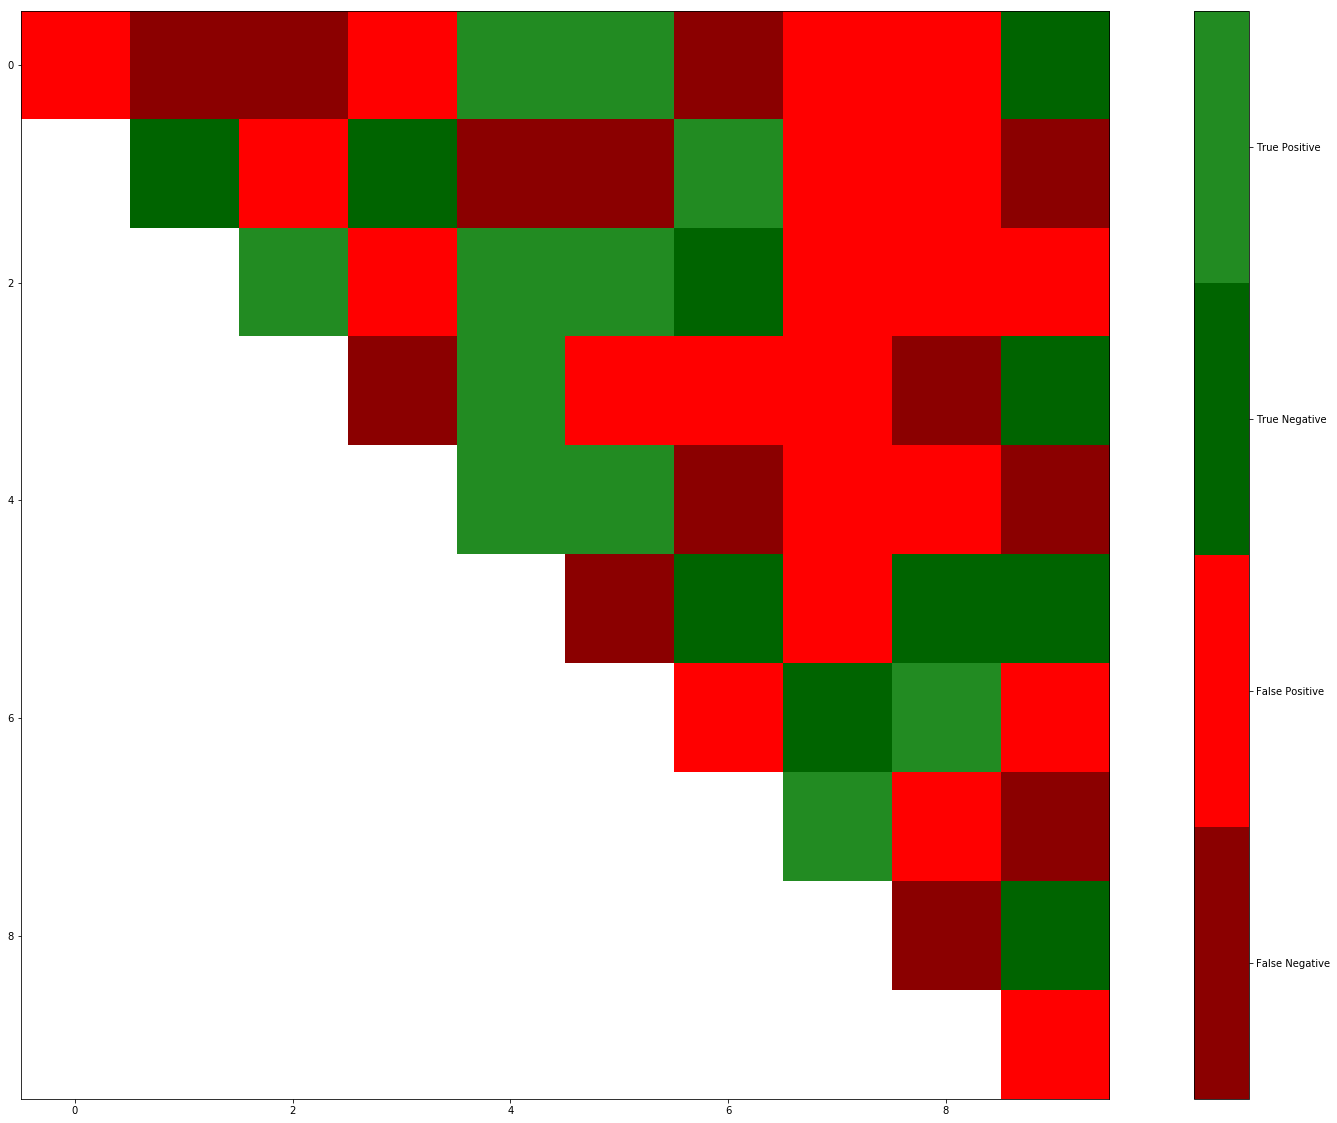